In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv



In [2]:
#   USE ESPONENTIAL OR CONSTANT
use_exp = True

if use_exp == True:
    distribution = "Exp"
    dddistribution = "exp"
elif use_exp == False:
    distribution = "Con"
    dddistribution = "con"

#   target_tso = ["50"]
detailed = True
if detailed == True :
    target_tso = list(range(24, 51+1, 3) )
else :
    if use_exp == True :
        target_tso = ["25","30","35", "40", "45", "50"]
    elif use_exp == False:
        target_tso = ["25","30","35", "40", "45", "50"]


# USE ALL ITERATIONS OR ONLY FIRST
num_iterations = 30

use_all = False

target_tn = 30

# PROBABILITY
probability = 50

In [3]:
print(target_tso)

[24, 27, 30, 33, 36, 39, 42, 45, 48, 51]


In [6]:
#   run,type,module,name,attrname,attrvalue,vectime,vecvalue
#   file : expTNconTSOcompJvector51.csv
#   conTNexpTSOcompJvector51.csv


#   target_tso = ["25"]
    
r1 = "vector"
r2 = "J_Network.server_"
r3 = "completedJob:vector"
server_names = [0, 1]

general_array = []
for srvn in range(0, len(server_names)):
    jrespTime_all_tsos = []
    for tso_this_iter in range(0, len(target_tso), 1) :
        #   print(tso_this_iter)
        jrespTime_all_this_tso = []

        file_name_csv = f'conTNexpTSOcompJvector{target_tso[tso_this_iter]}.csv'

        with open(f'../simulations/results/{file_name_csv}') as csv_file : 
            reader = csv.reader(csv_file)
            for row in reader:
                if row[1]==r1 and row[2] == f'{r2}{server_names[srvn]}' and row[3]==r3:
                    rigaTarget = list(row)
                    print("hit row : ", row)
                    #   print("listed row : ", rigaTarget)
                    #   print("len : ", len(rigaTarget))    #   15 .
                    #   print("13 : ", rigaTarget[13])  #   13 :  88842.22 92268.143 94401.199 97374.126 102381.932
                    #   print("14 : ", rigaTarget[14])  #   14 :  1733.82 1115.235 343.087 879.005 3157.046 1277.006
                    #   print("len 13 : ", len(rigaTarget[13]) )
                    #   print("len 14 : ", len(rigaTarget[14]) )
                    
                    tempi_risposta = rigaTarget[-1].split(" ")
                    #   numeri = rigaTarget[-1].split(" ")
                    #   for cont in range(0, len(tempi)):
                    #       jrespTime_all_this_tso.append( ( int(numeri[cont]) , float(tempi[cont]) ) )
                    for cont in range(0, len(tempi_risposta)):
                        jrespTime_all_this_tso.append(tempi_risposta[cont])
                    
                    if use_all == False:
                        print("break")
                        break

        jrespTime_all_tsos.append(jrespTime_all_this_tso)
        print(f'{file_name_csv} _ len : {len(jrespTime_all_tsos[tso_this_iter])}' )
    general_array.append(jrespTime_all_tsos)

# now we have all tsos of all !


hit row :  ['conTNexpTSOP50-0-20240115-19:00:43-17476', 'vector', 'J_Network.server_0', 'completedJob:vector', '', '', '1728119.484 1730191.803 1737451.932 1737517.358 1737805.962 1739275.482 1743005.609 1747084.528 1750078.482 1753309.346 1756679.152 1758354.892 1759813.625 1760698.786 1762452.735 1766863.792 1768505.773 1772772.696 1773609.671 1779328.293 1780567.119 1786503.547 1788692.751 1791827.974 1793339.077 1794815.98 1799972.039 1801119.155 1805261.622 1806306.327 1807627.995 1809355.355 1810969.252 1813437.07 1816508.715 1818942.425 1820796.935 1822183.764 1825277.917 1827012.892 1829136.153 1831613.955 1832810.492 1835810.274 1840547.993 1841482.161 1847574.137 1850646.926 1853580.814 1855337.949 1859783.238 1863553.711 1864954.87 1869785.261 1873044.54 1876049.896 1878333.759 1881353.175 1883038.56 1884921.703 1887800.182 1891642.767 1892930.81 1895644.598 1898728.867 1901828.285 1902824.816 1912576.684 1914581.775 1914806.838 1915561.572 1918871.288 1921654.972 1925702.30

In [7]:
#   for srvn in range(0, len(server_names)):
#       for tso_this_iter in range(0, len(target_tso), 1) :
#           for row in reader:
#               ...
#               if use_all == False:
#                   print("break")
#                   break


print(len(general_array))       #   2
print(general_array[0])
print(len(general_array[0]))    #   6
print(general_array[0][0])

2
[['119.484', '391.803', '5851.932', '2317.358', '805.962', '475.482', '2405.609', '2884.528', '4078.482', '109.346', '1679.152', '1554.892', '1213.625', '298.786', '252.735', '1063.792', '905.773', '3372.696', '609.671', '928.293', '367.119', '2703.547', '1292.751', '2627.974', '539.077', '215.98', '3572.039', '1119.155', '3461.622', '906.327', '427.995', '355.355', '169.252', '837.07', '308.715', '942.425', '996.935', '583.764', '1877.917', '12.892', '336.153', '1013.955', '410.492', '1610.274', '2747.993', '82.161', '774.137', '246.926', '1380.814', '1337.949', '383.238', '553.711', '154.87', '3185.261', '1044.54', '2249.896', '933.759', '353.175', '238.56', '321.703', '1400.182', '1642.767', '1130.81', '244.598', '1528.867', '1028.285', '224.816', '6376.684', '4781.775', '1406.838', '361.572', '71.288', '1054.972', '3302.307', '2215.433', '1809.249', '32.52', '535.016', '564.622', '718.744', '2970.658', '121.297', '2681.94', '625.035', '1113.328', '1.46', '2900.83', '1410.976', '4

In [8]:

#   #   for i in jQueueLen_vector:
#   #       nums.append( int(i[0]))
#   #   print(nums)

general_nums = []
for srvn in range(0, len(server_names)):
    nums_all_tsos = []
    for tso_this_iter in range(0, len(target_tso), 1) :
        nums = []
        for i in range(0, len(general_array[srvn][tso_this_iter]) ):
            #   print( general_array[srvn][tso_this_iter][i] )
            #   print(int(general_array[srvn][tso_this_iter][i]))
            #   #   !!! for histogram we need numbers not strings ! 
            nums.append( float( general_array[srvn][tso_this_iter][i]) )
        nums_all_tsos.append(nums)
        print(f'testExp_{target_tso[tso_this_iter]} len : {len(nums_all_tsos[tso_this_iter])}' )
    general_nums.append(nums_all_tsos)
# got all nums of all tsos

print(general_nums)

testExp_24 len : 1161
testExp_27 len : 1189
testExp_30 len : 1206
testExp_33 len : 1225
testExp_36 len : 1243
testExp_39 len : 1241
testExp_42 len : 1264
testExp_45 len : 1273
testExp_48 len : 1204
testExp_51 len : 1132
testExp_24 len : 759
testExp_27 len : 732
testExp_30 len : 713
testExp_33 len : 696
testExp_36 len : 678
testExp_39 len : 676
testExp_42 len : 656
testExp_45 len : 643
testExp_48 len : 619
testExp_51 len : 586
[[[119.484, 391.803, 5851.932, 2317.358, 805.962, 475.482, 2405.609, 2884.528, 4078.482, 109.346, 1679.152, 1554.892, 1213.625, 298.786, 252.735, 1063.792, 905.773, 3372.696, 609.671, 928.293, 367.119, 2703.547, 1292.751, 2627.974, 539.077, 215.98, 3572.039, 1119.155, 3461.622, 906.327, 427.995, 355.355, 169.252, 837.07, 308.715, 942.425, 996.935, 583.764, 1877.917, 12.892, 336.153, 1013.955, 410.492, 1610.274, 2747.993, 82.161, 774.137, 246.926, 1380.814, 1337.949, 383.238, 553.711, 154.87, 3185.261, 1044.54, 2249.896, 933.759, 353.175, 238.56, 321.703, 1400.182,

1636.5786347975882


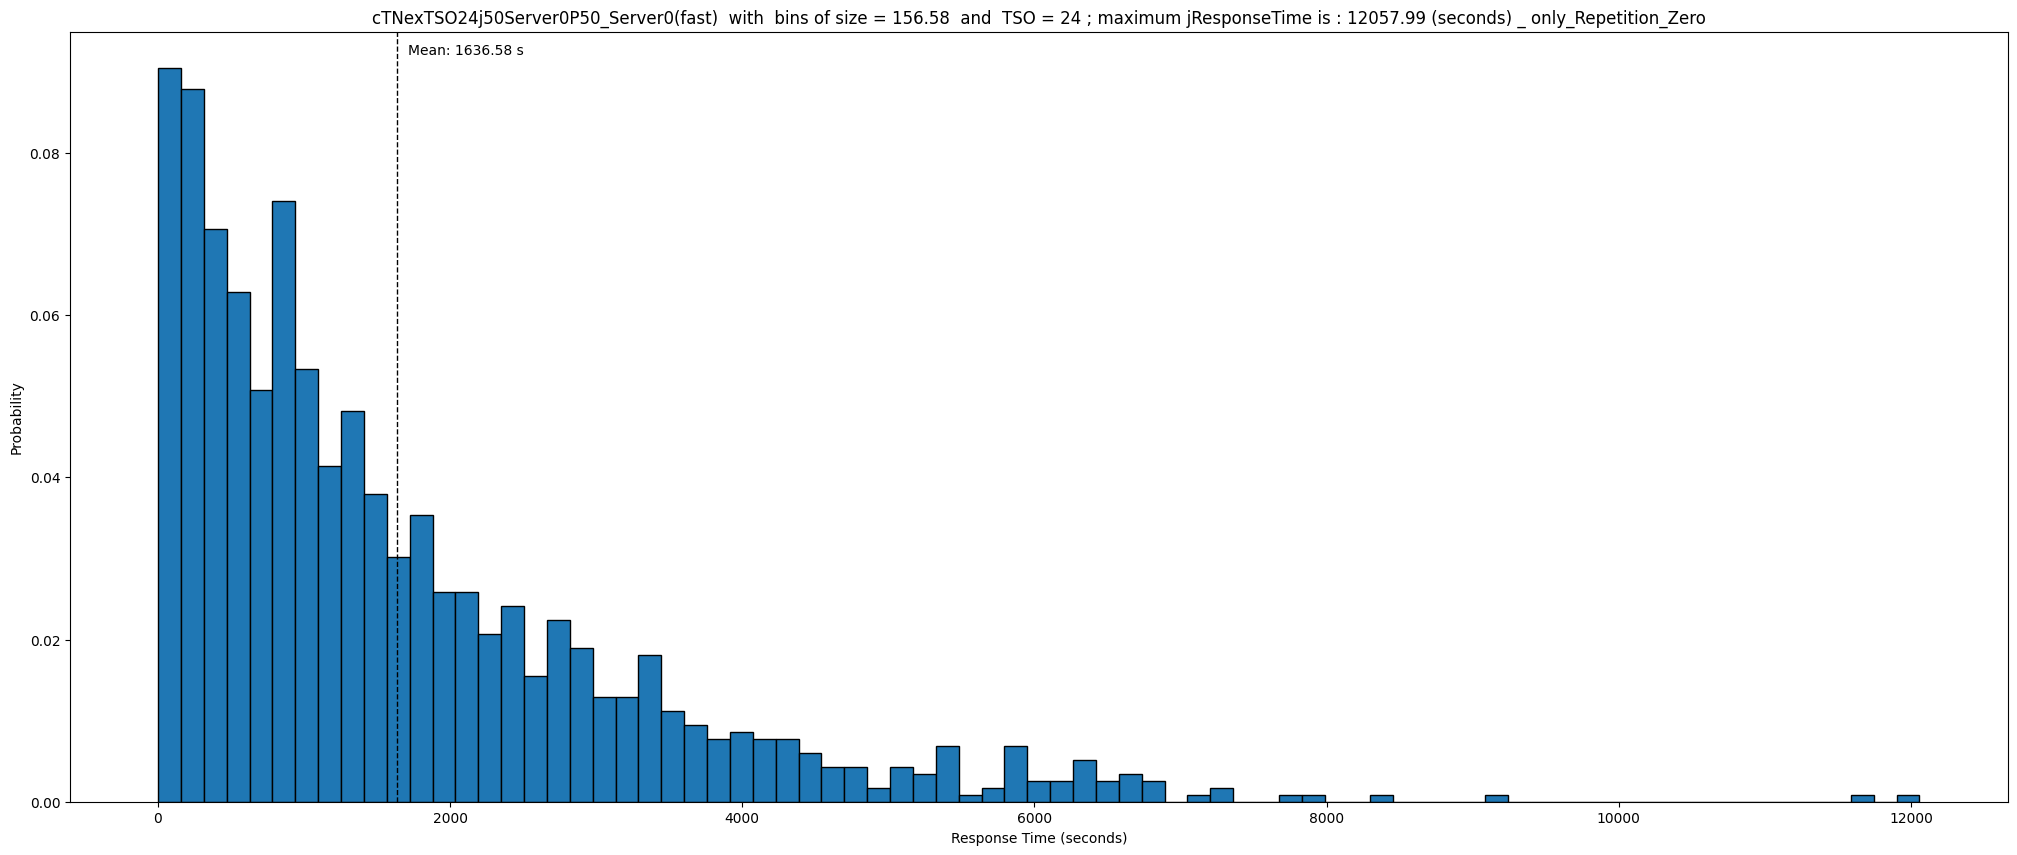

1976.4468645920942


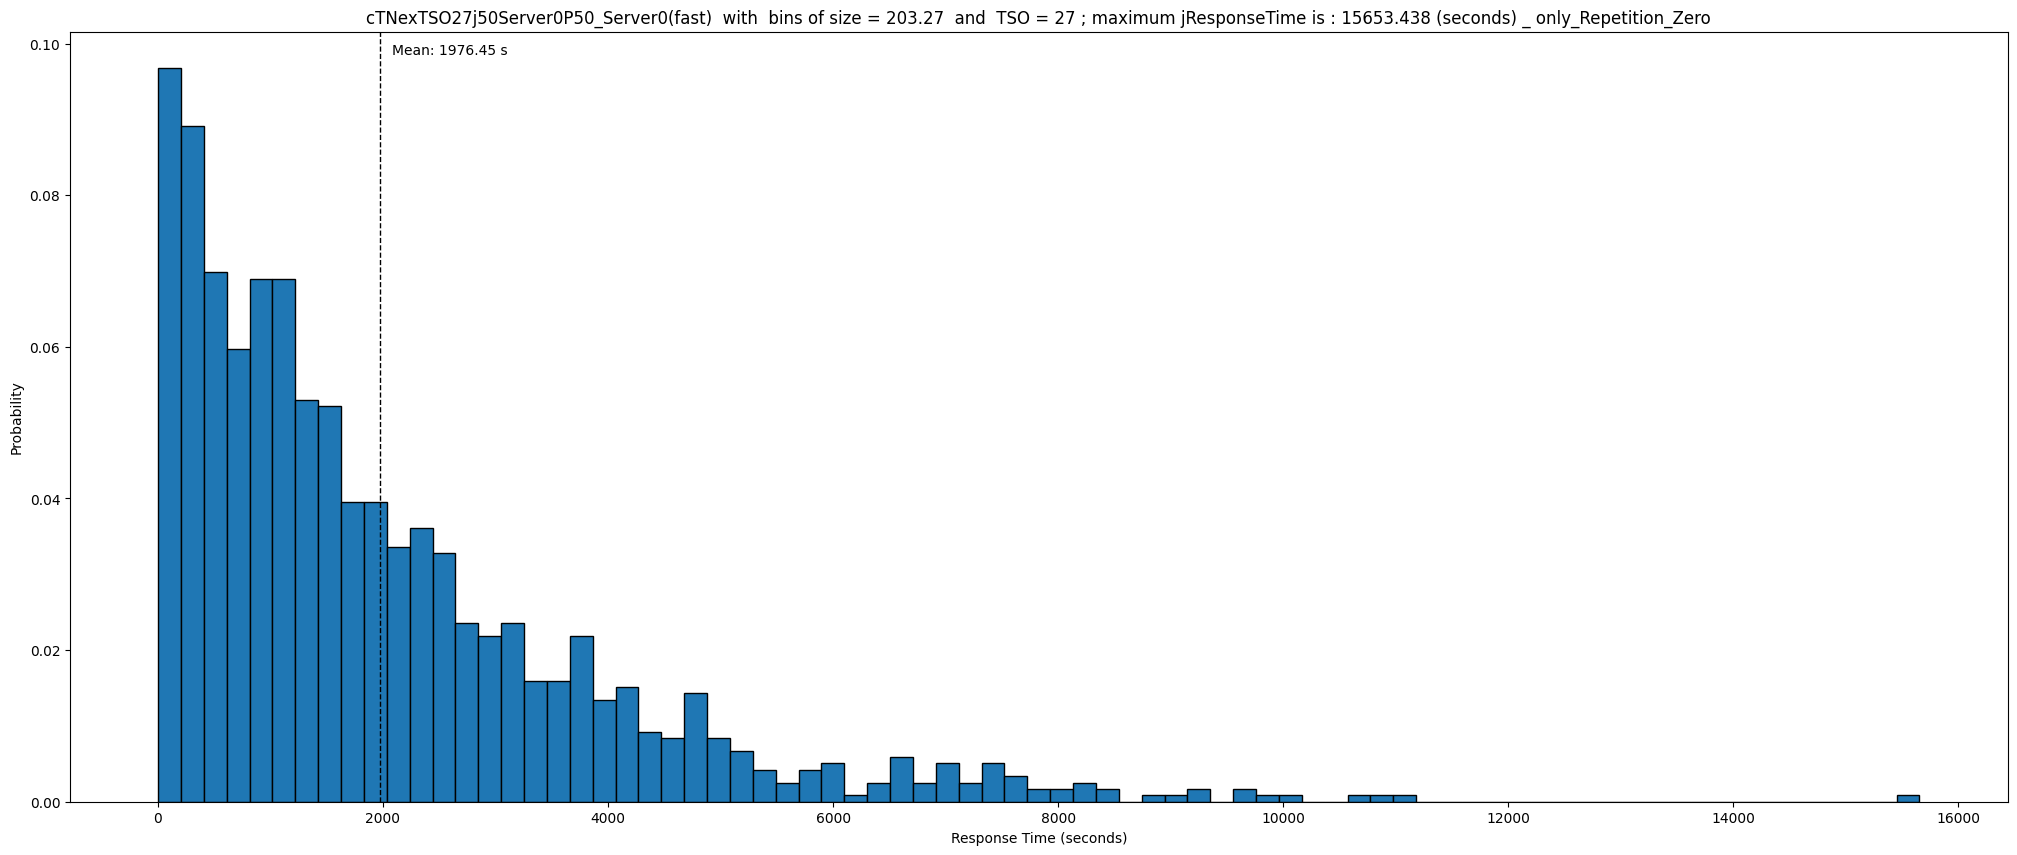

2486.2590199004976


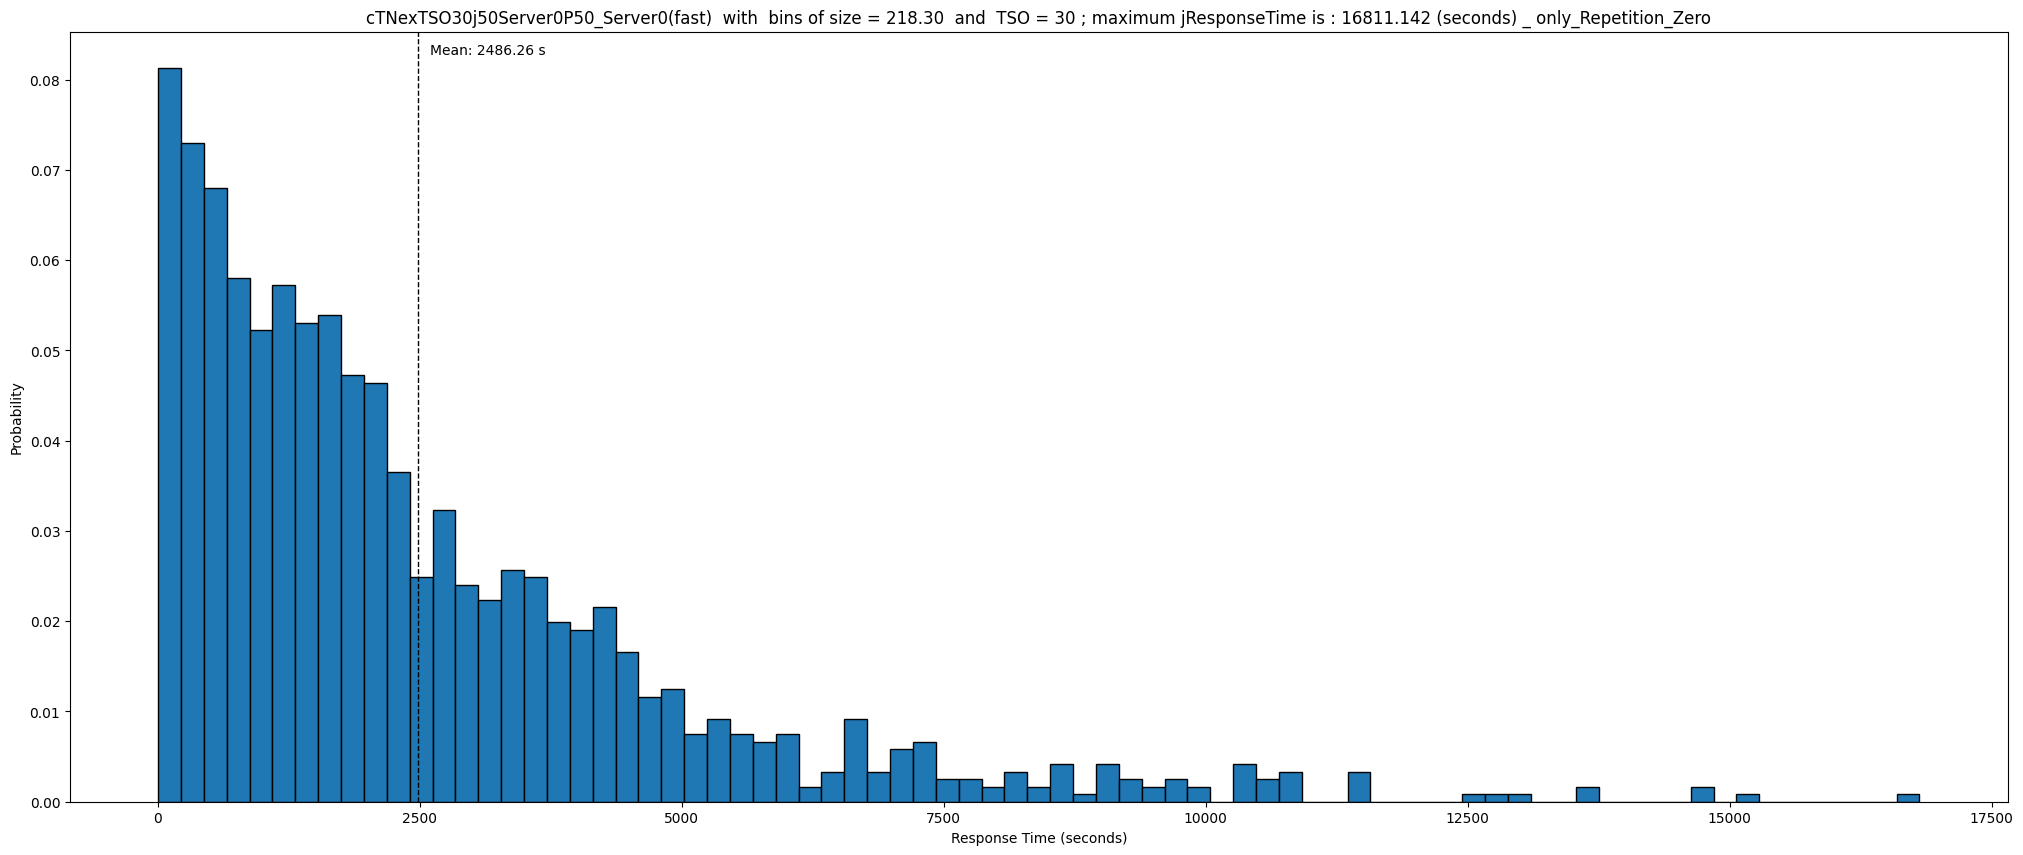

2991.1260236734693


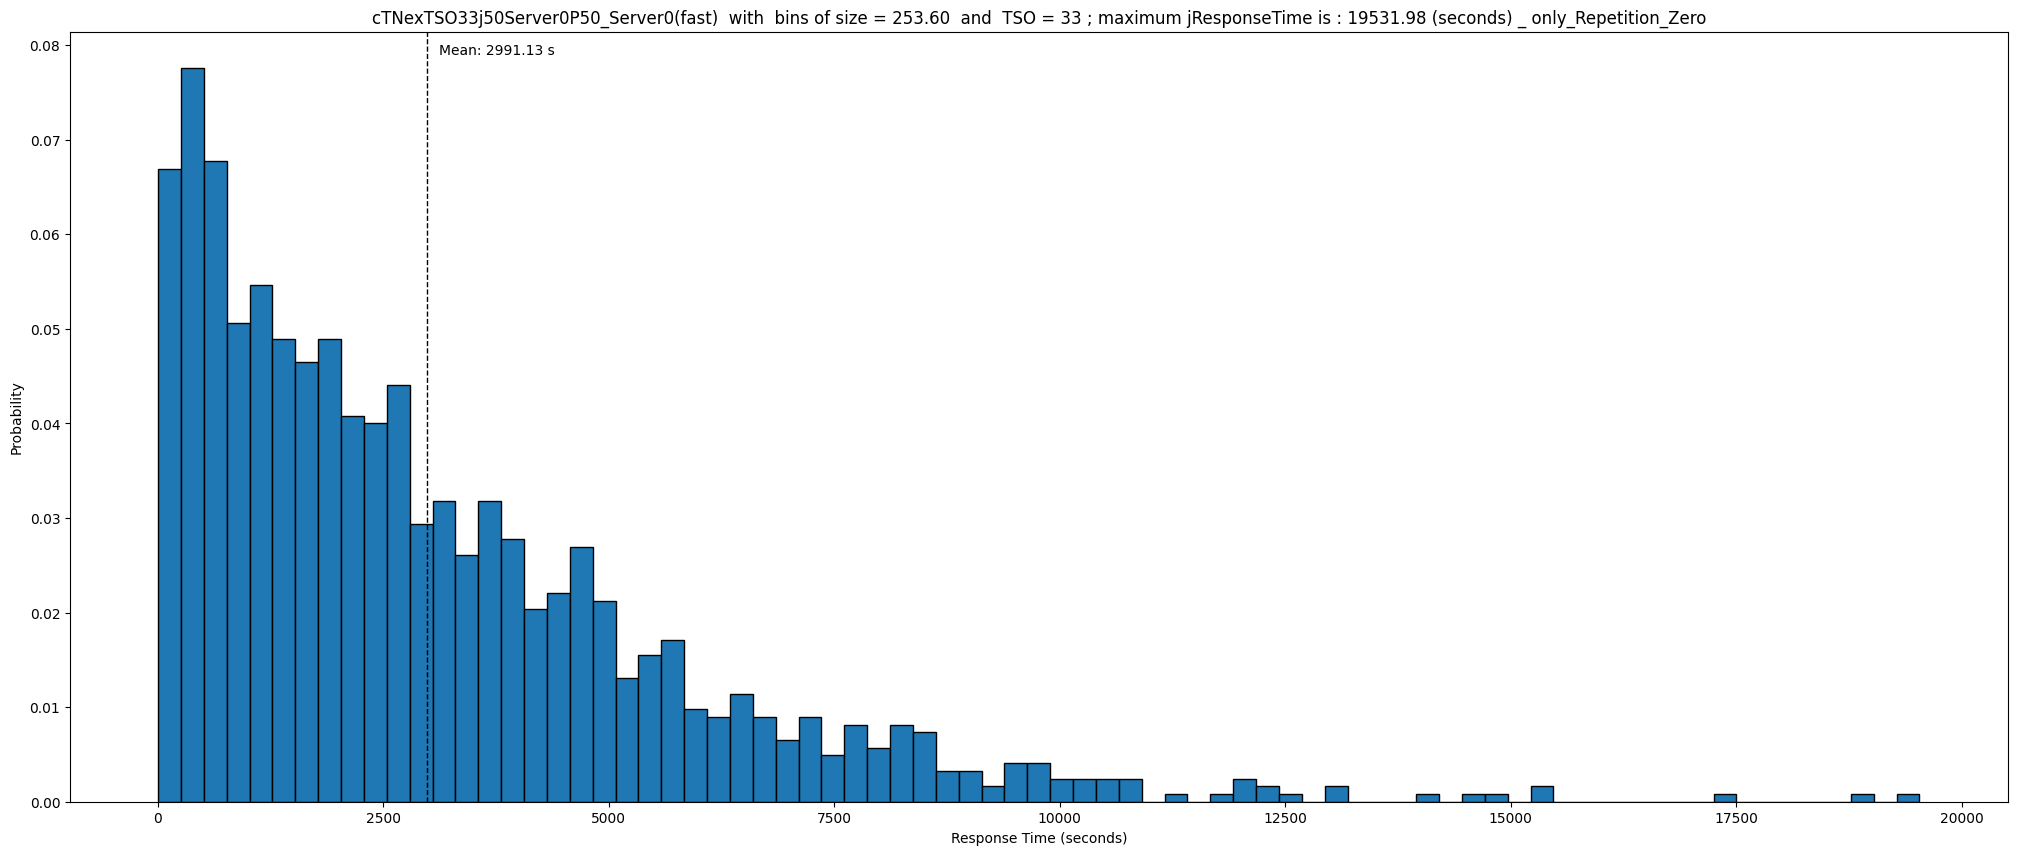

4183.803937248592


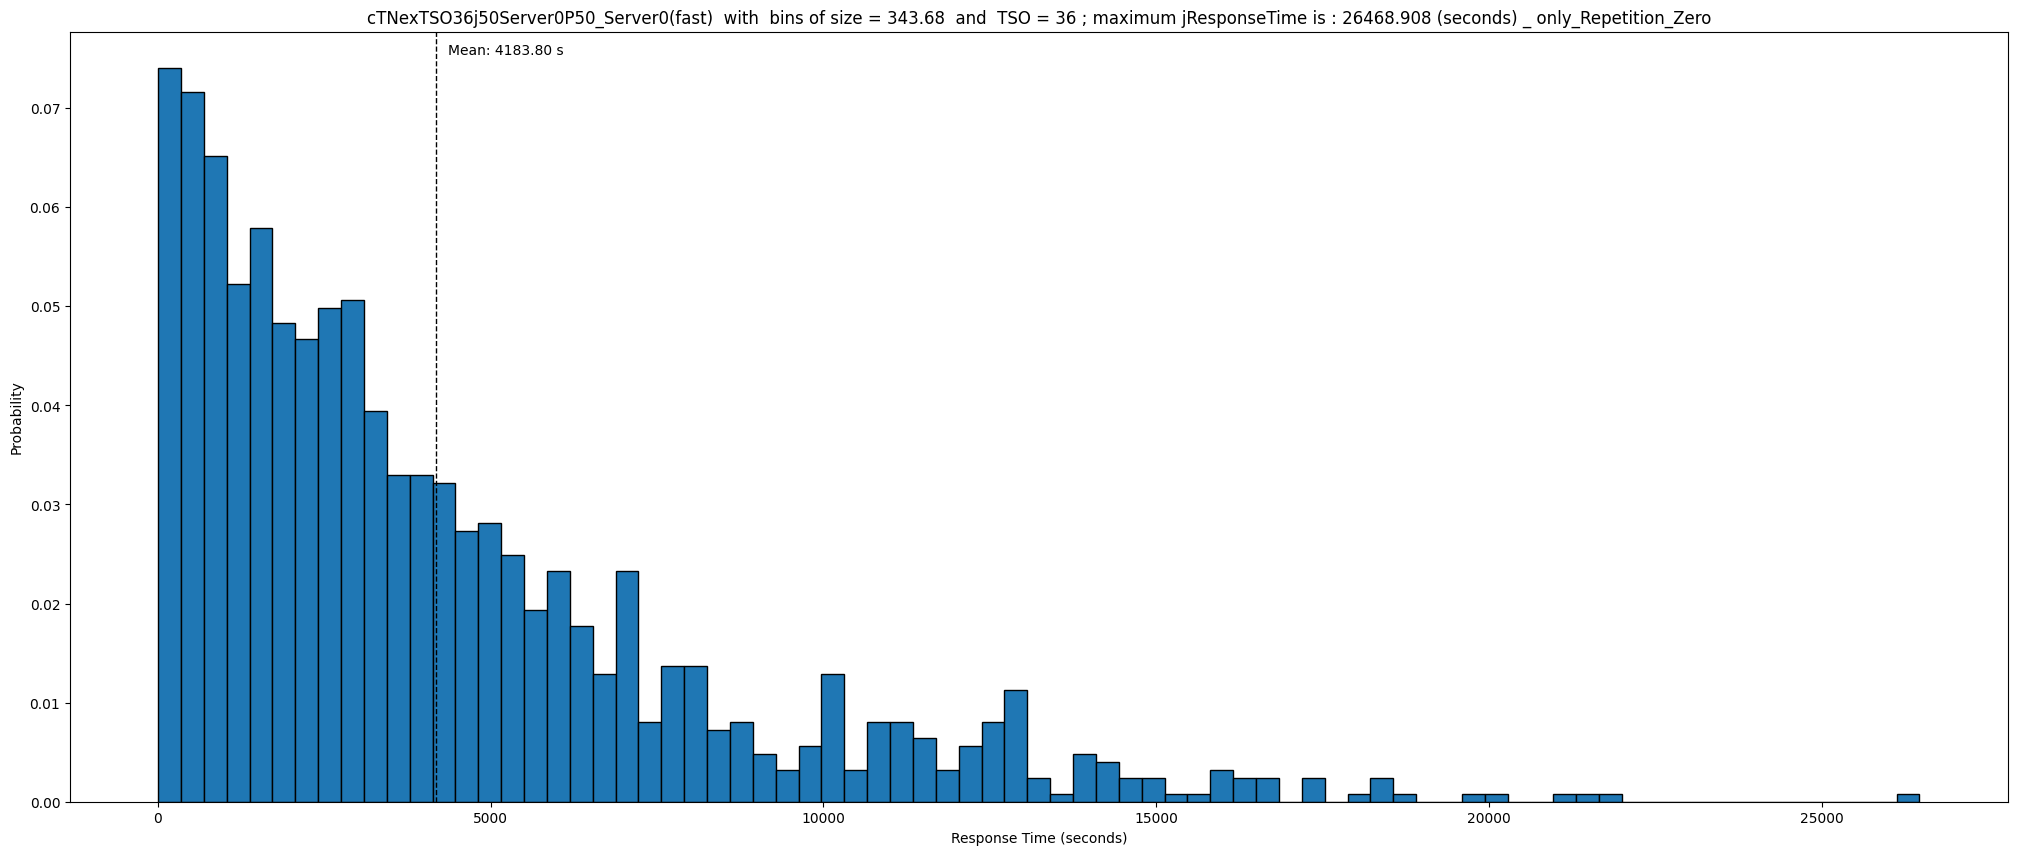

6423.02311361805


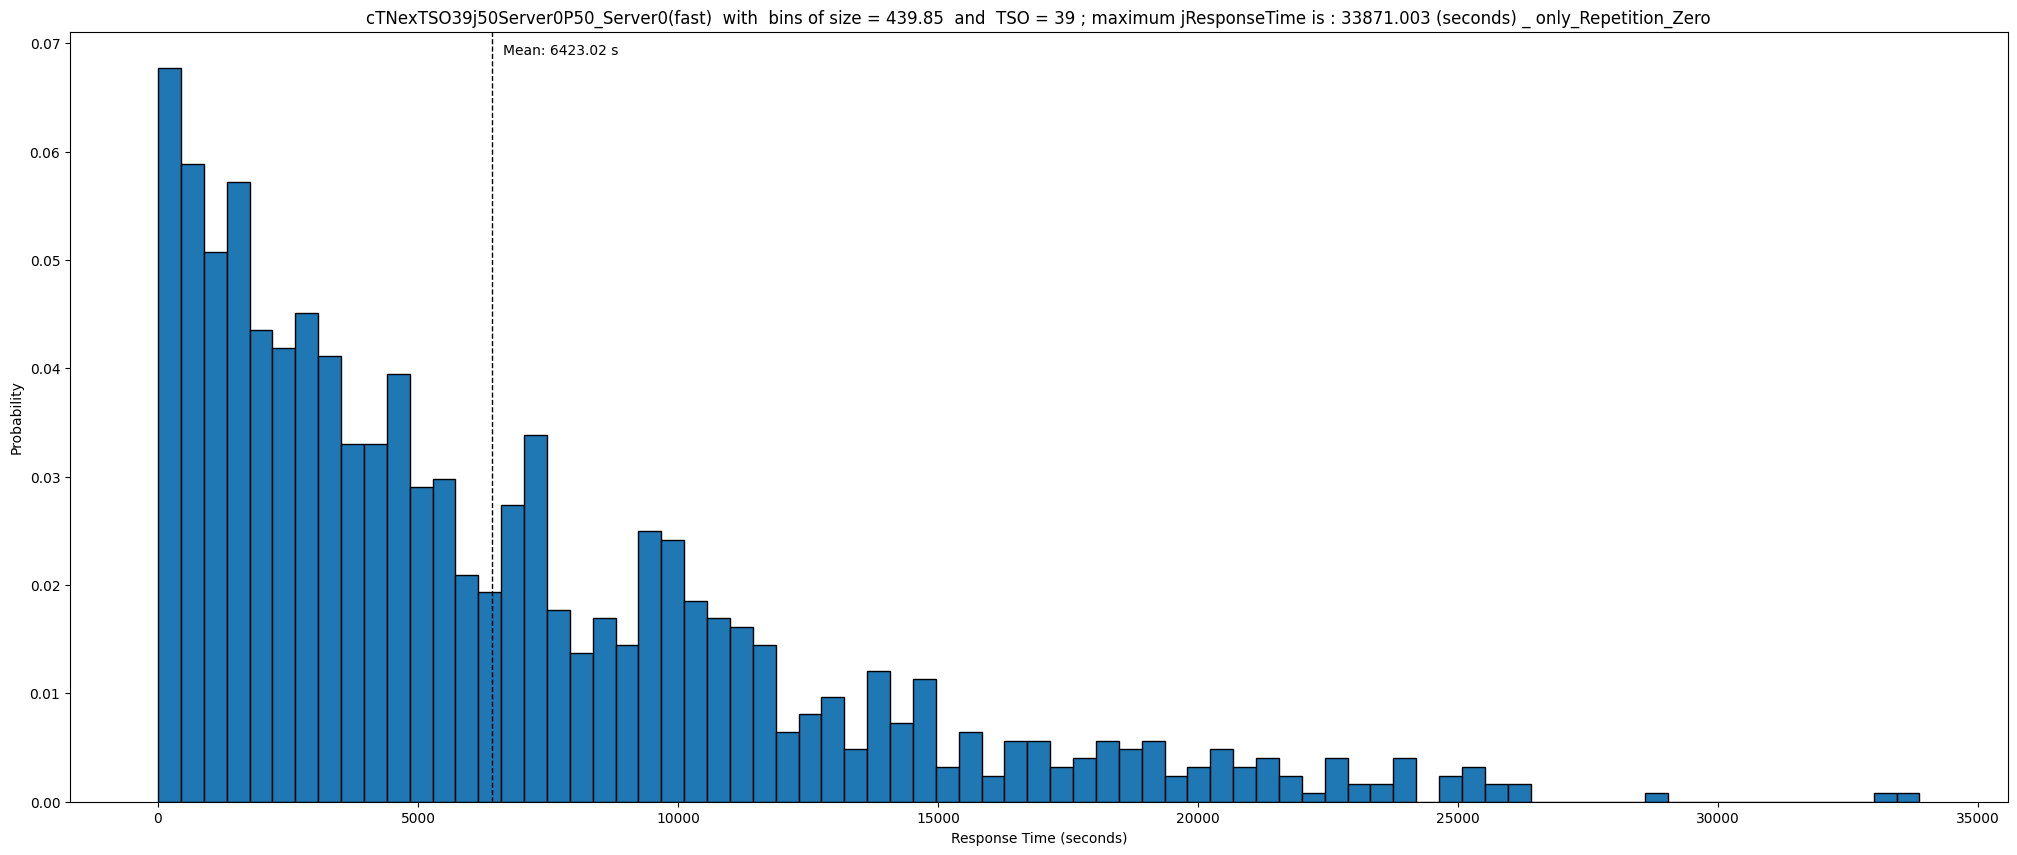

11120.242268196202


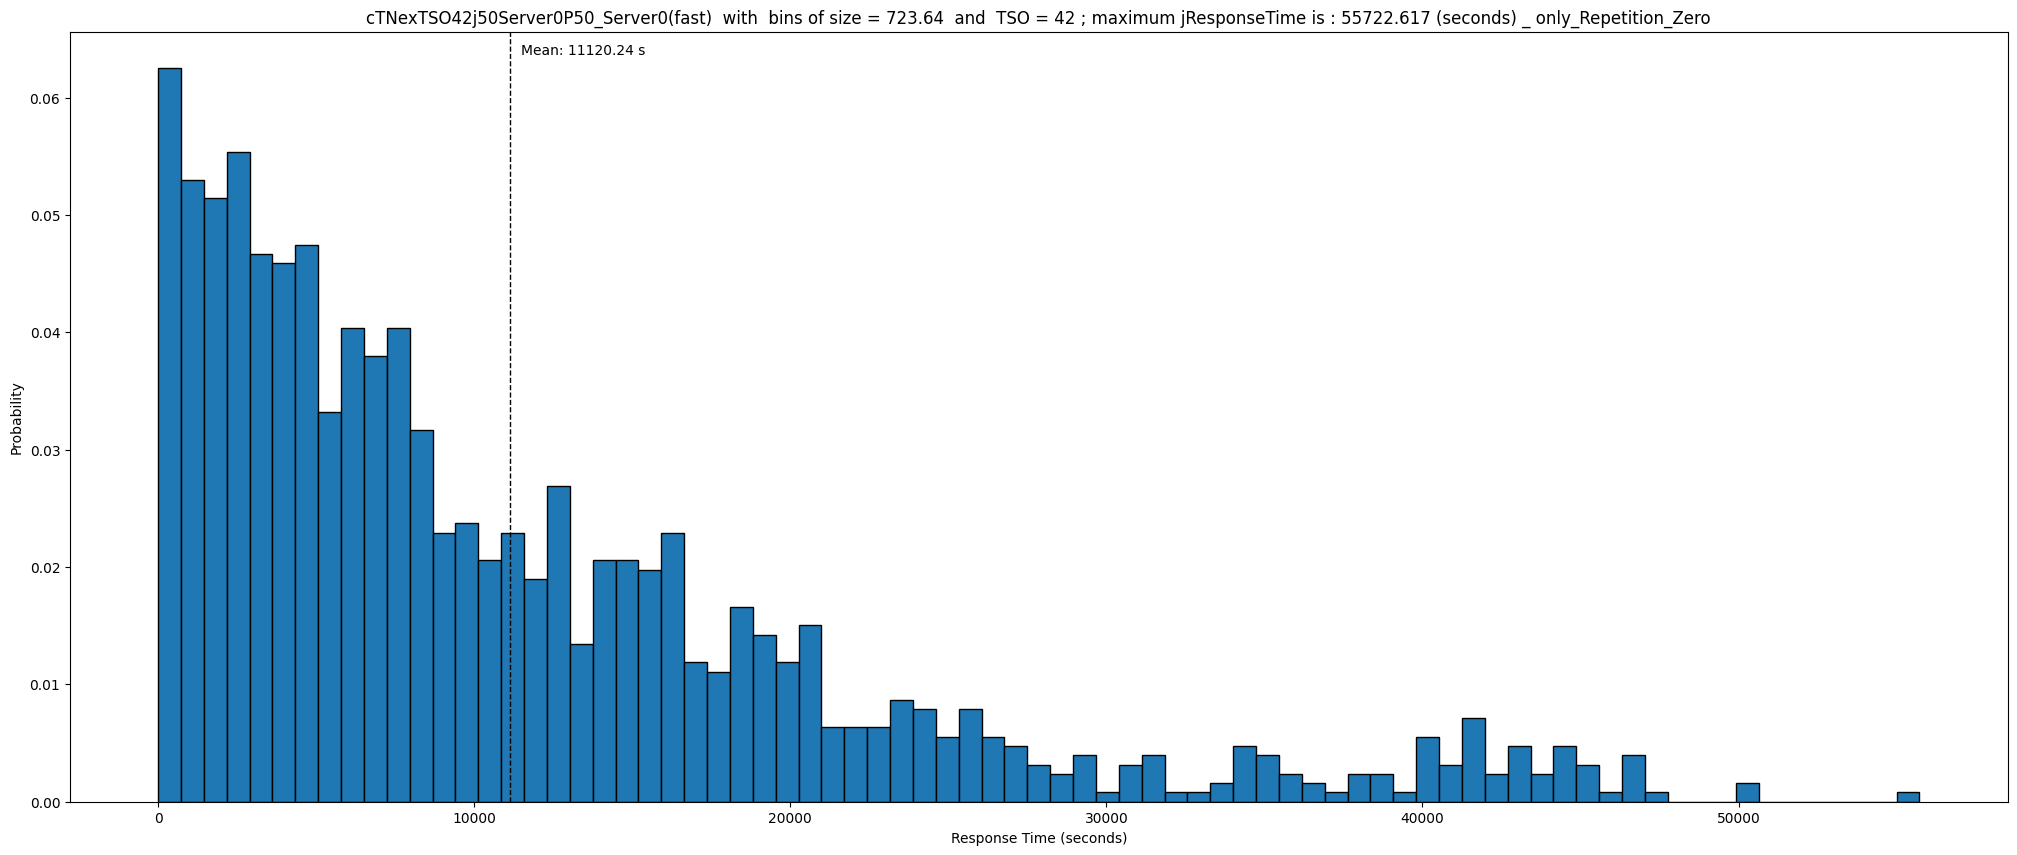

30750.116960722706


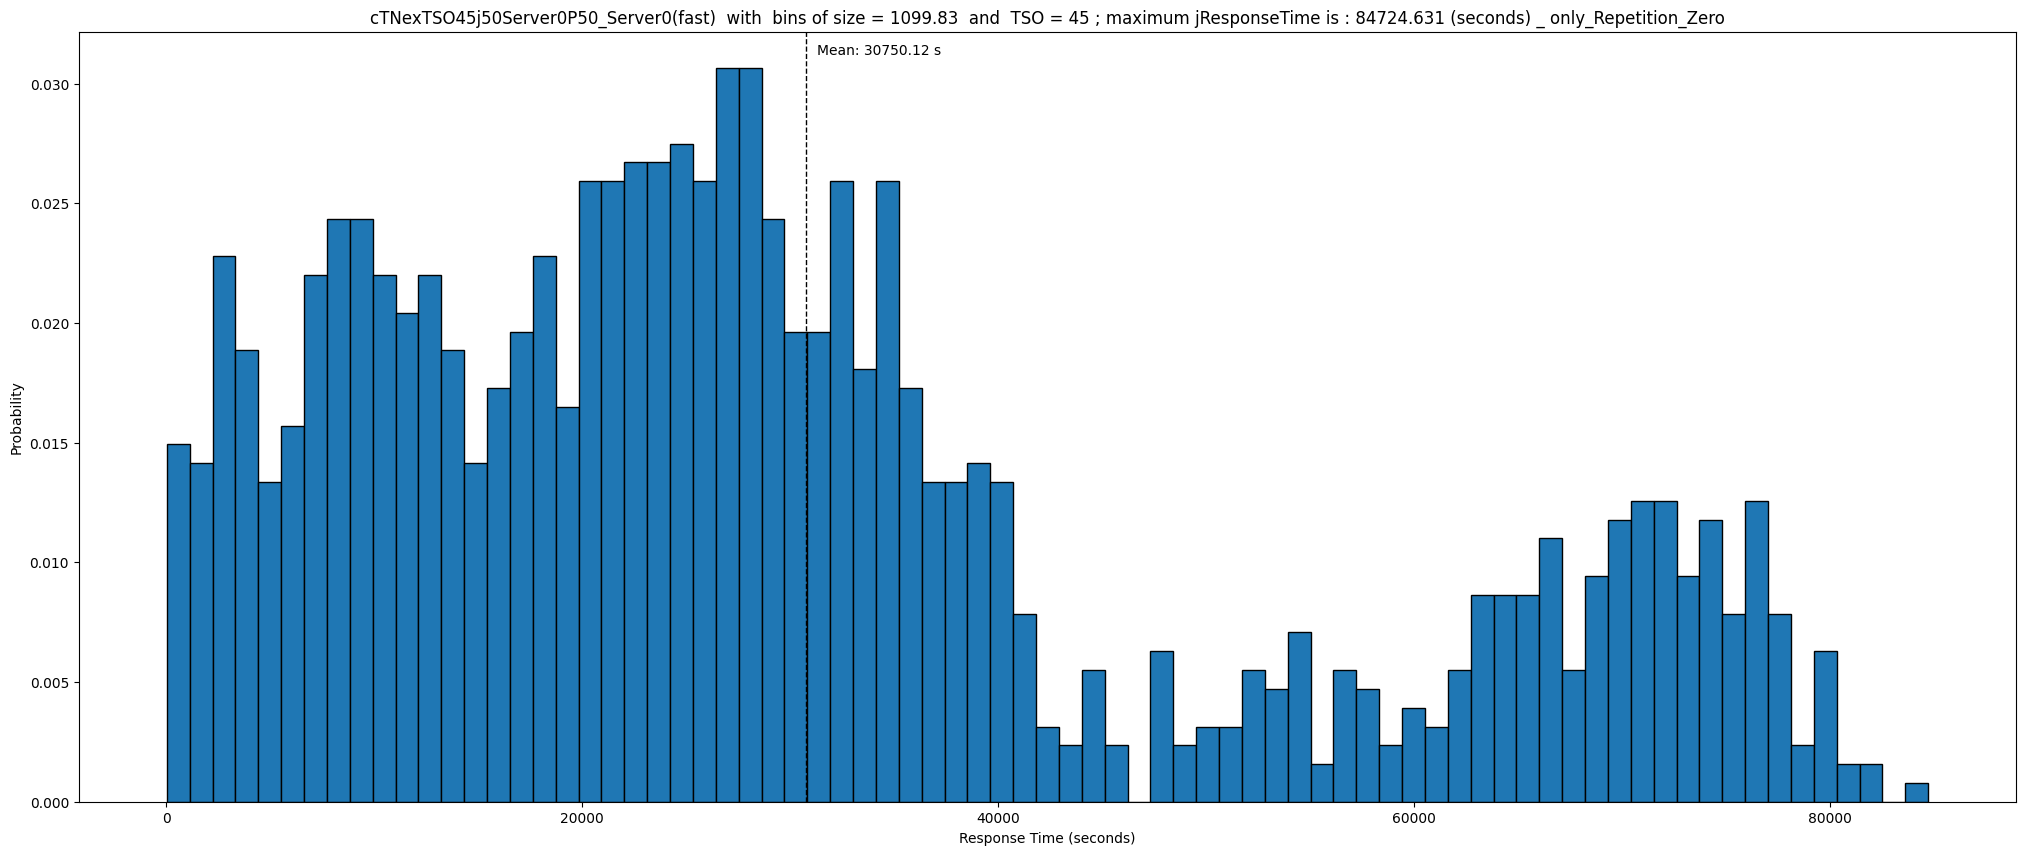

154359.56434302326


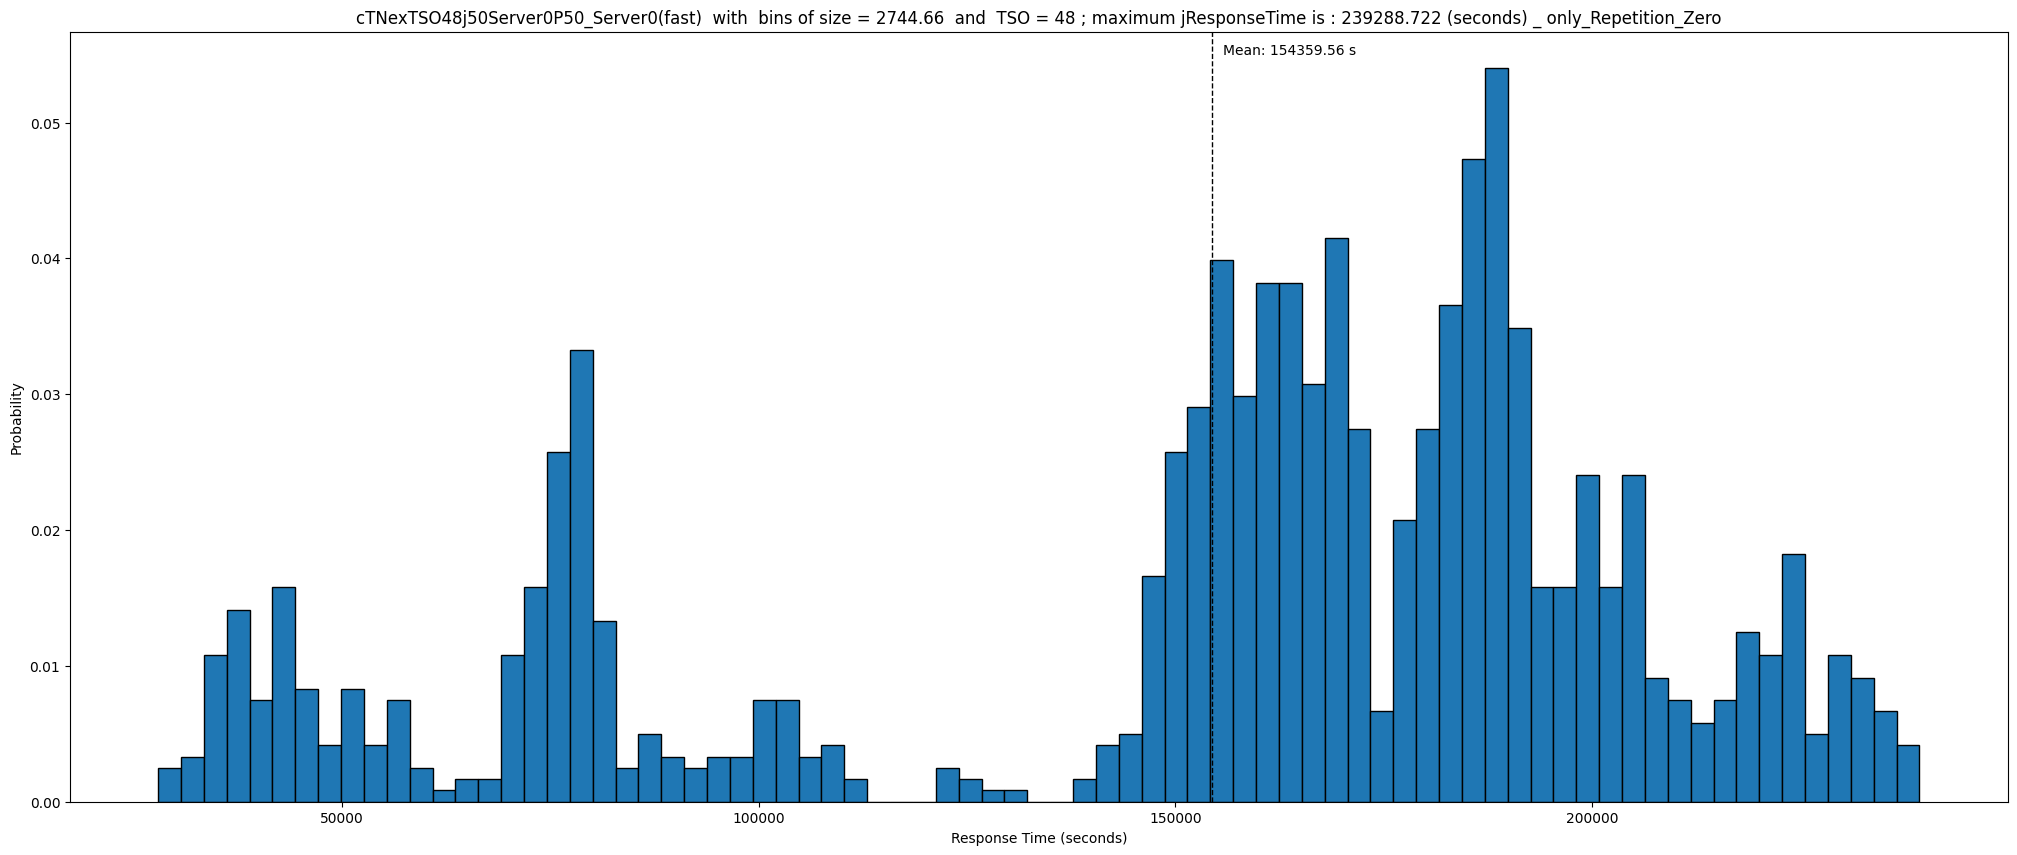

339346.07693286217


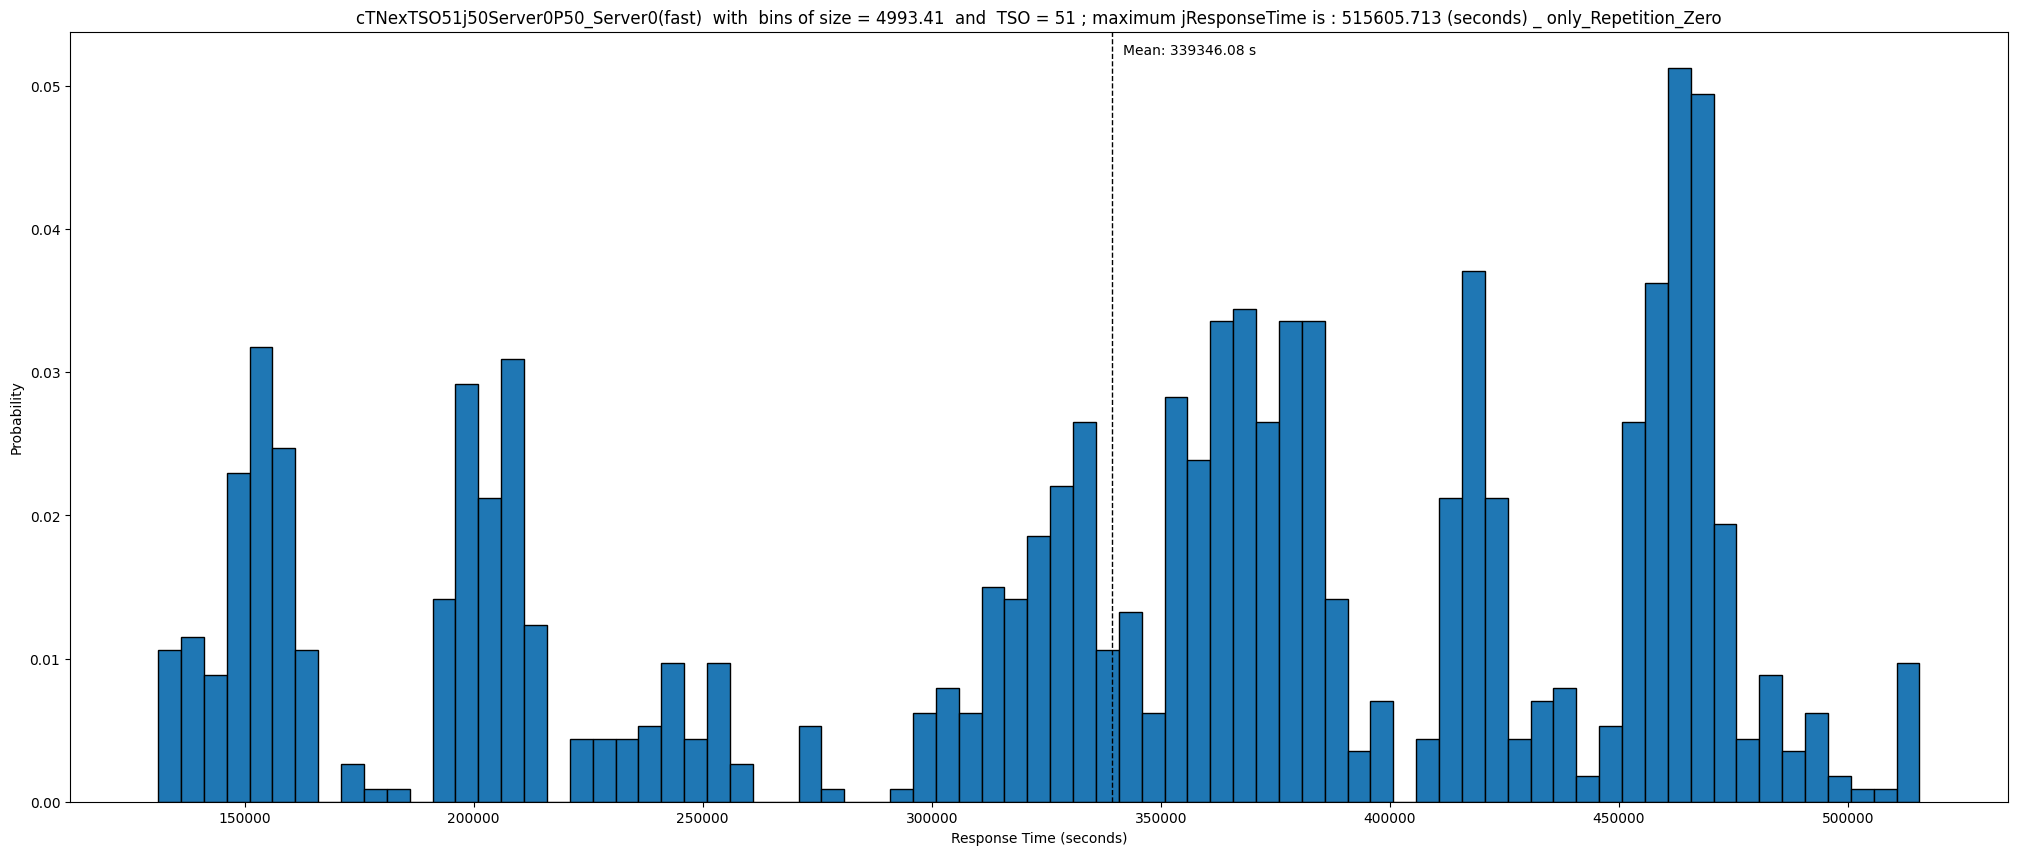

2924.821664031621


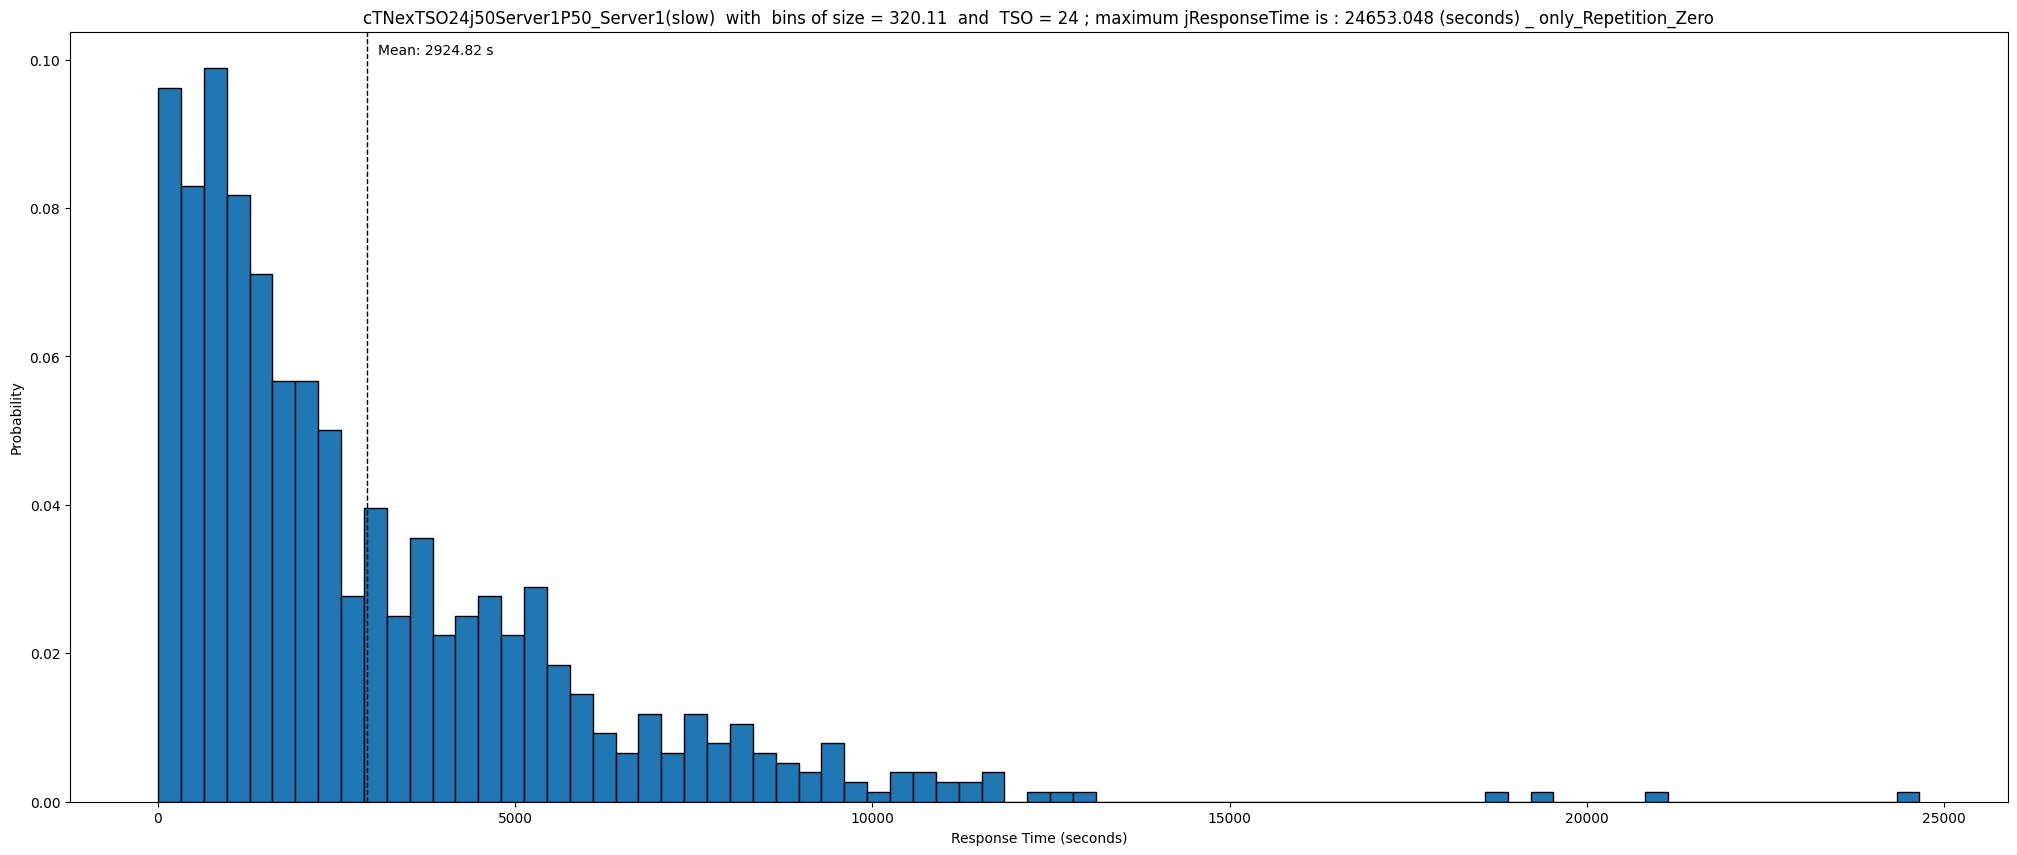

3419.0458128415303


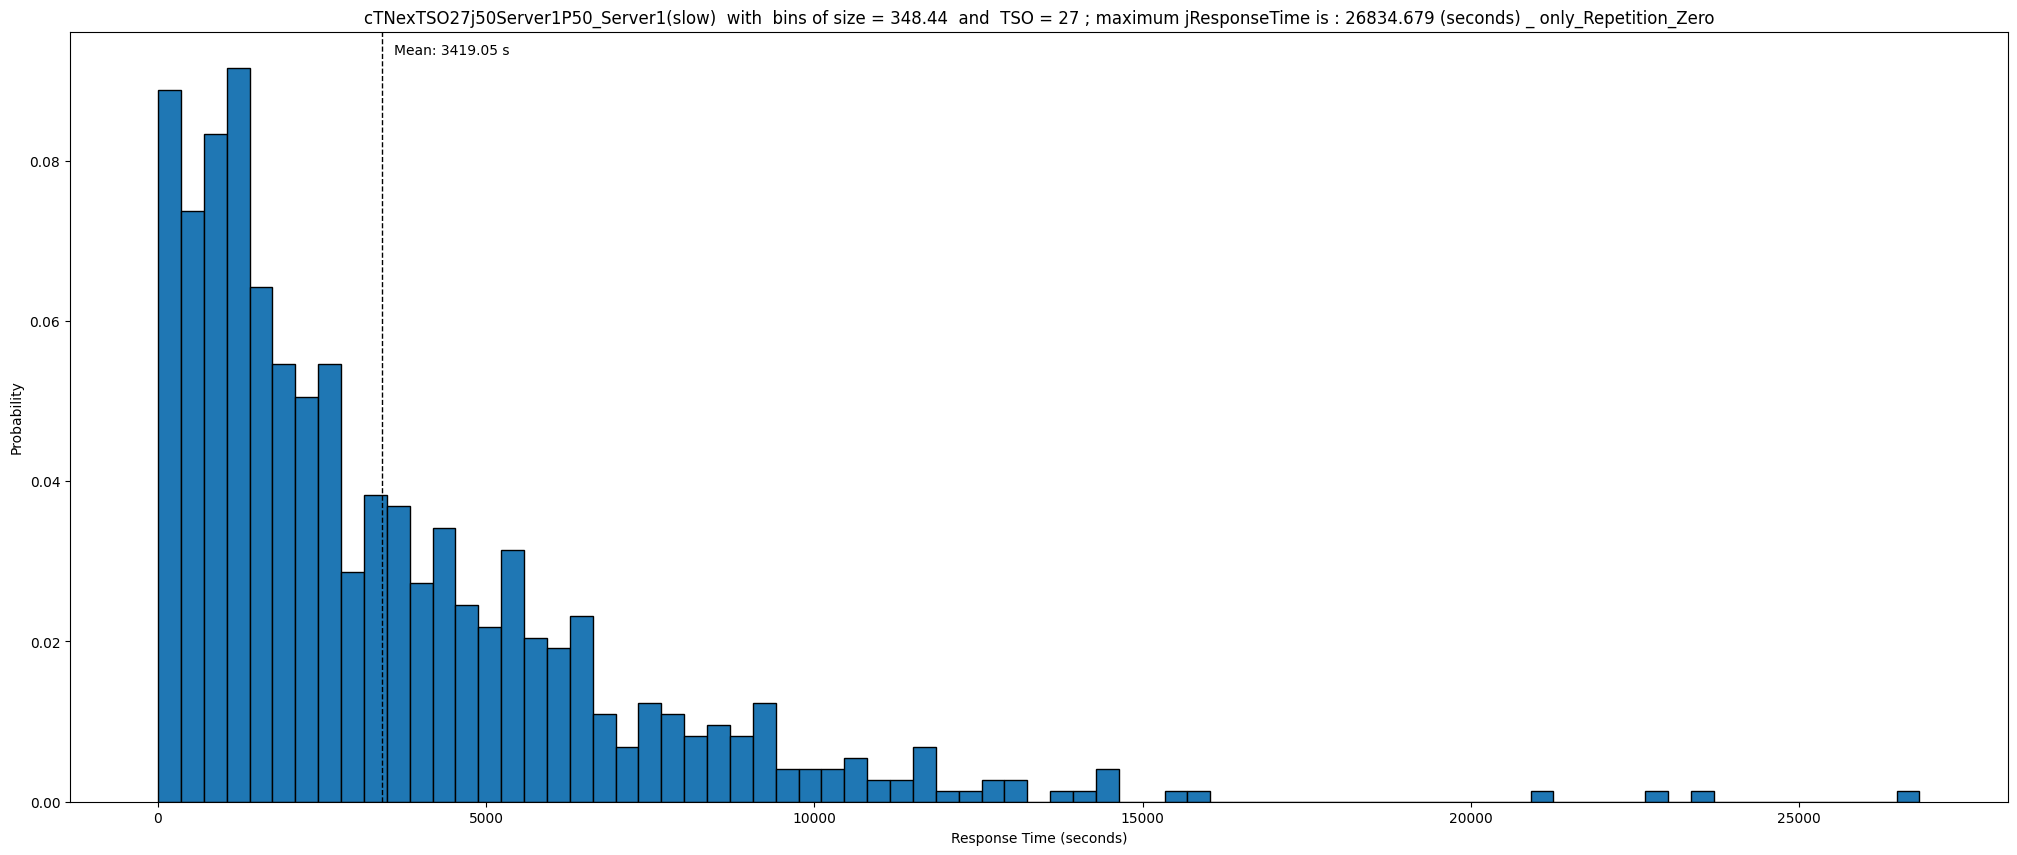

4094.8895988779805


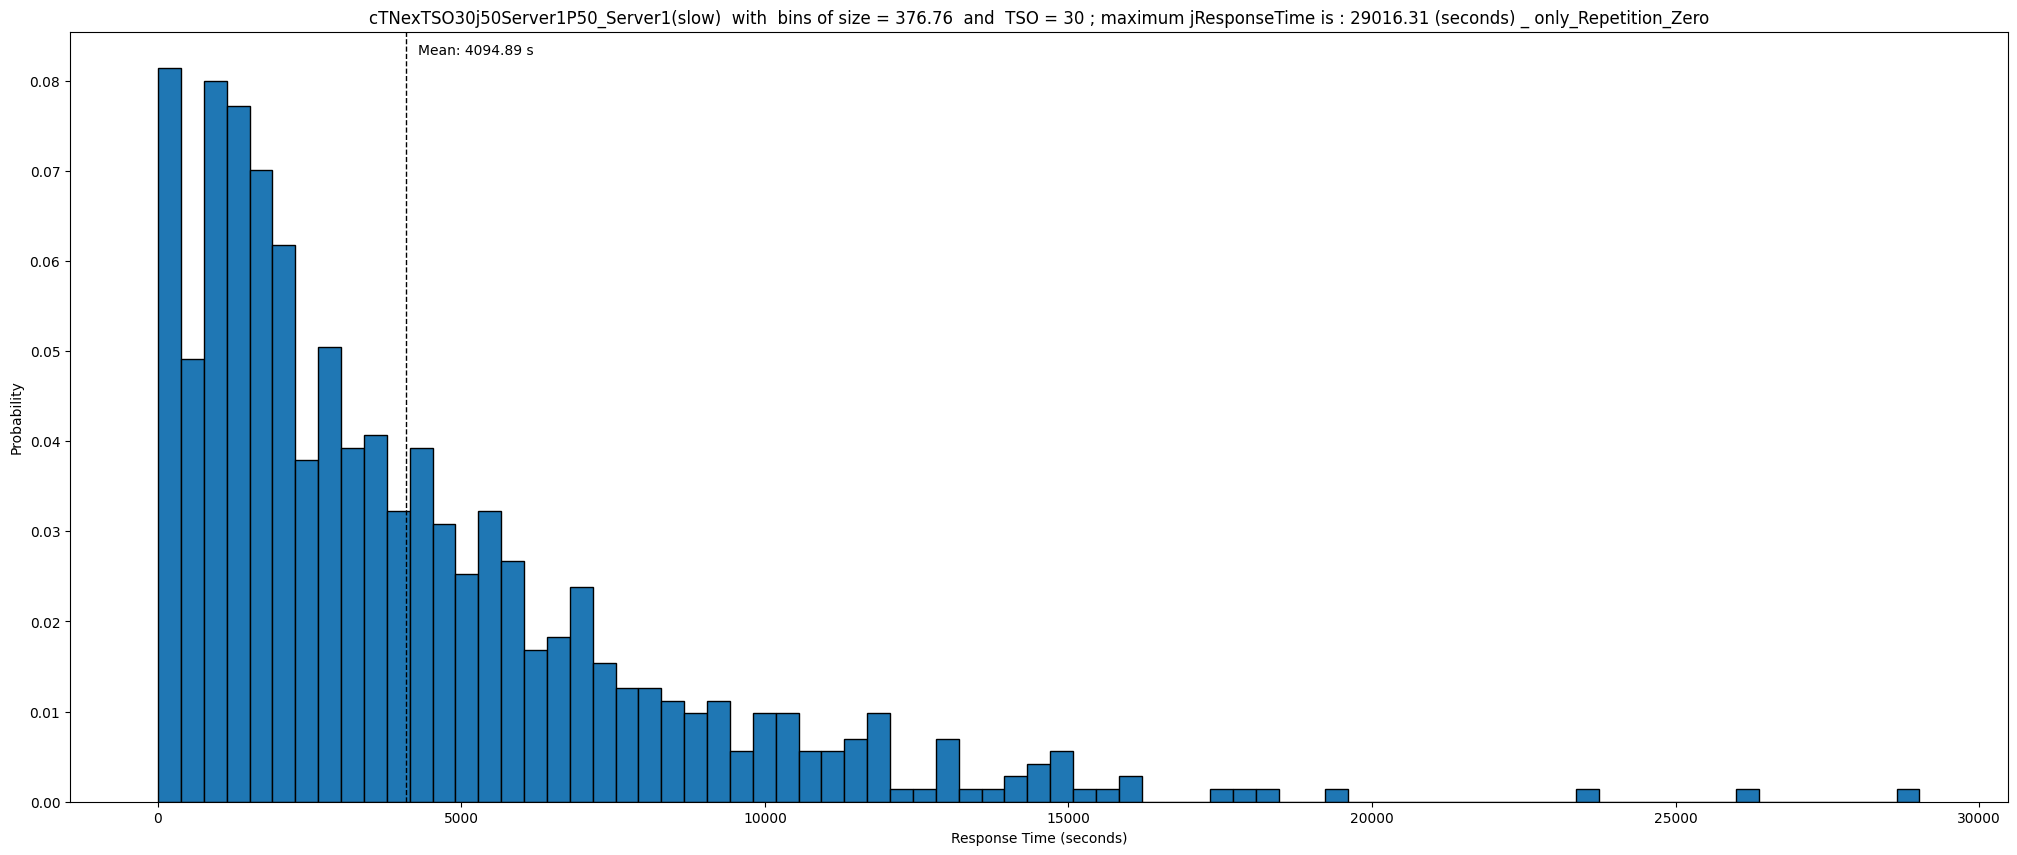

4939.512849137931


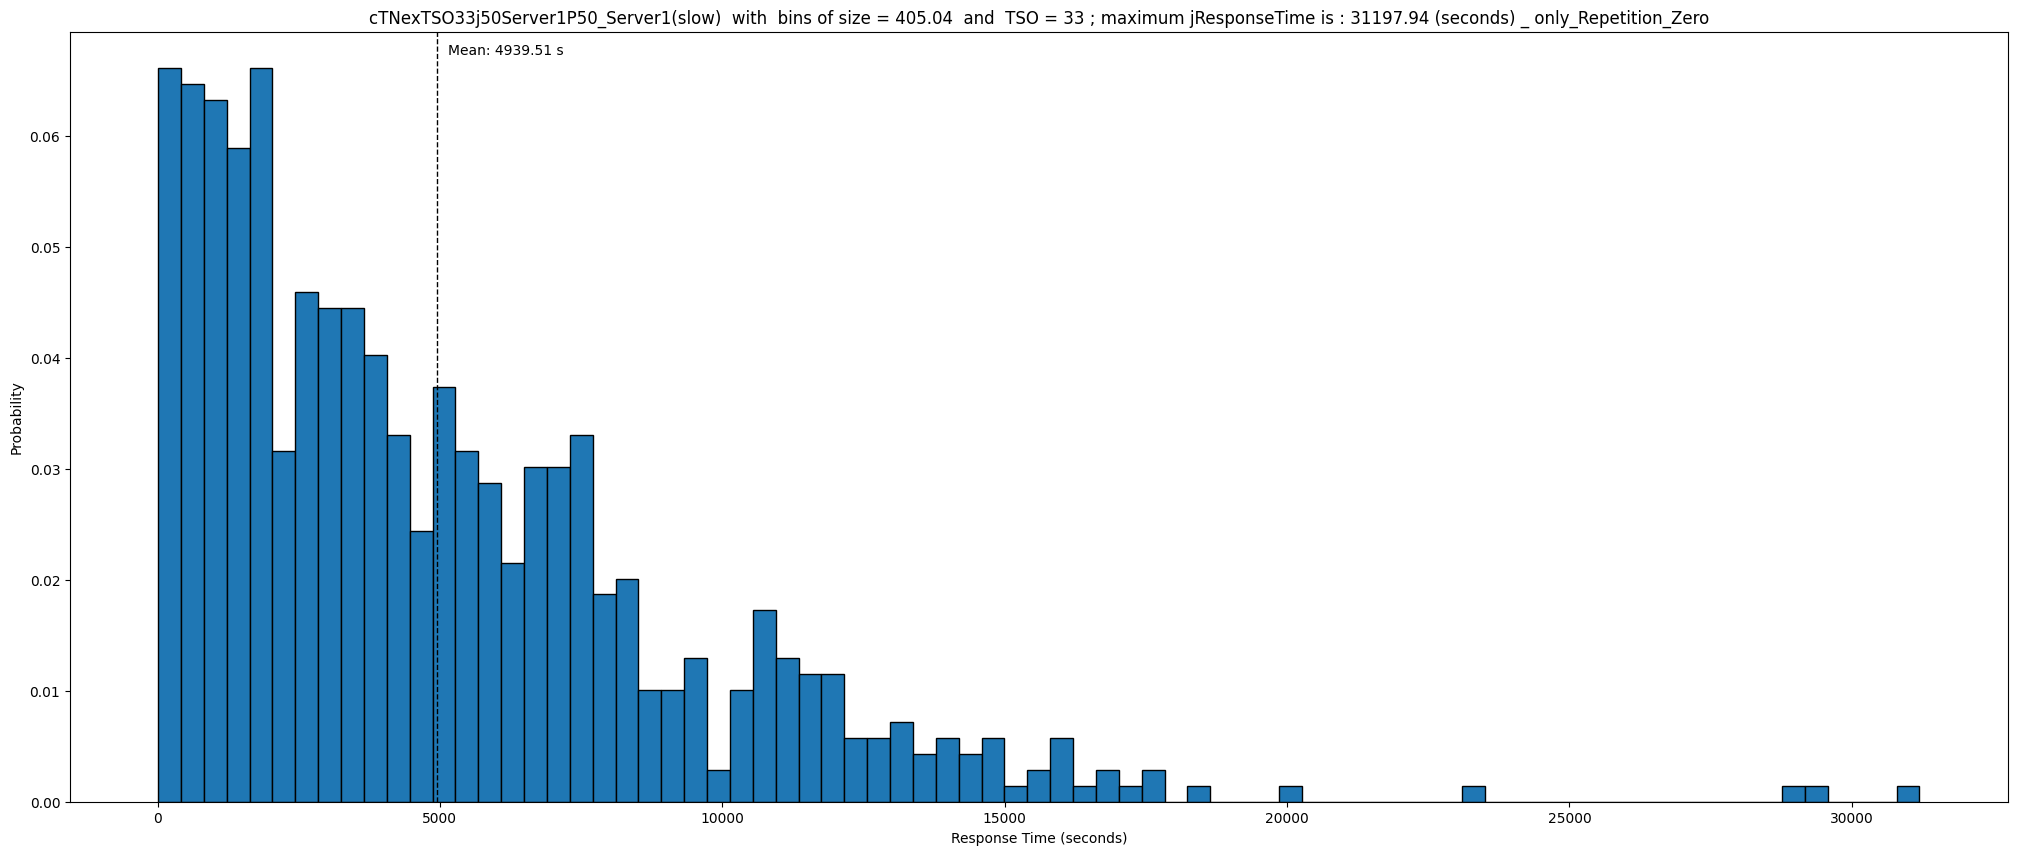

6374.814824483777


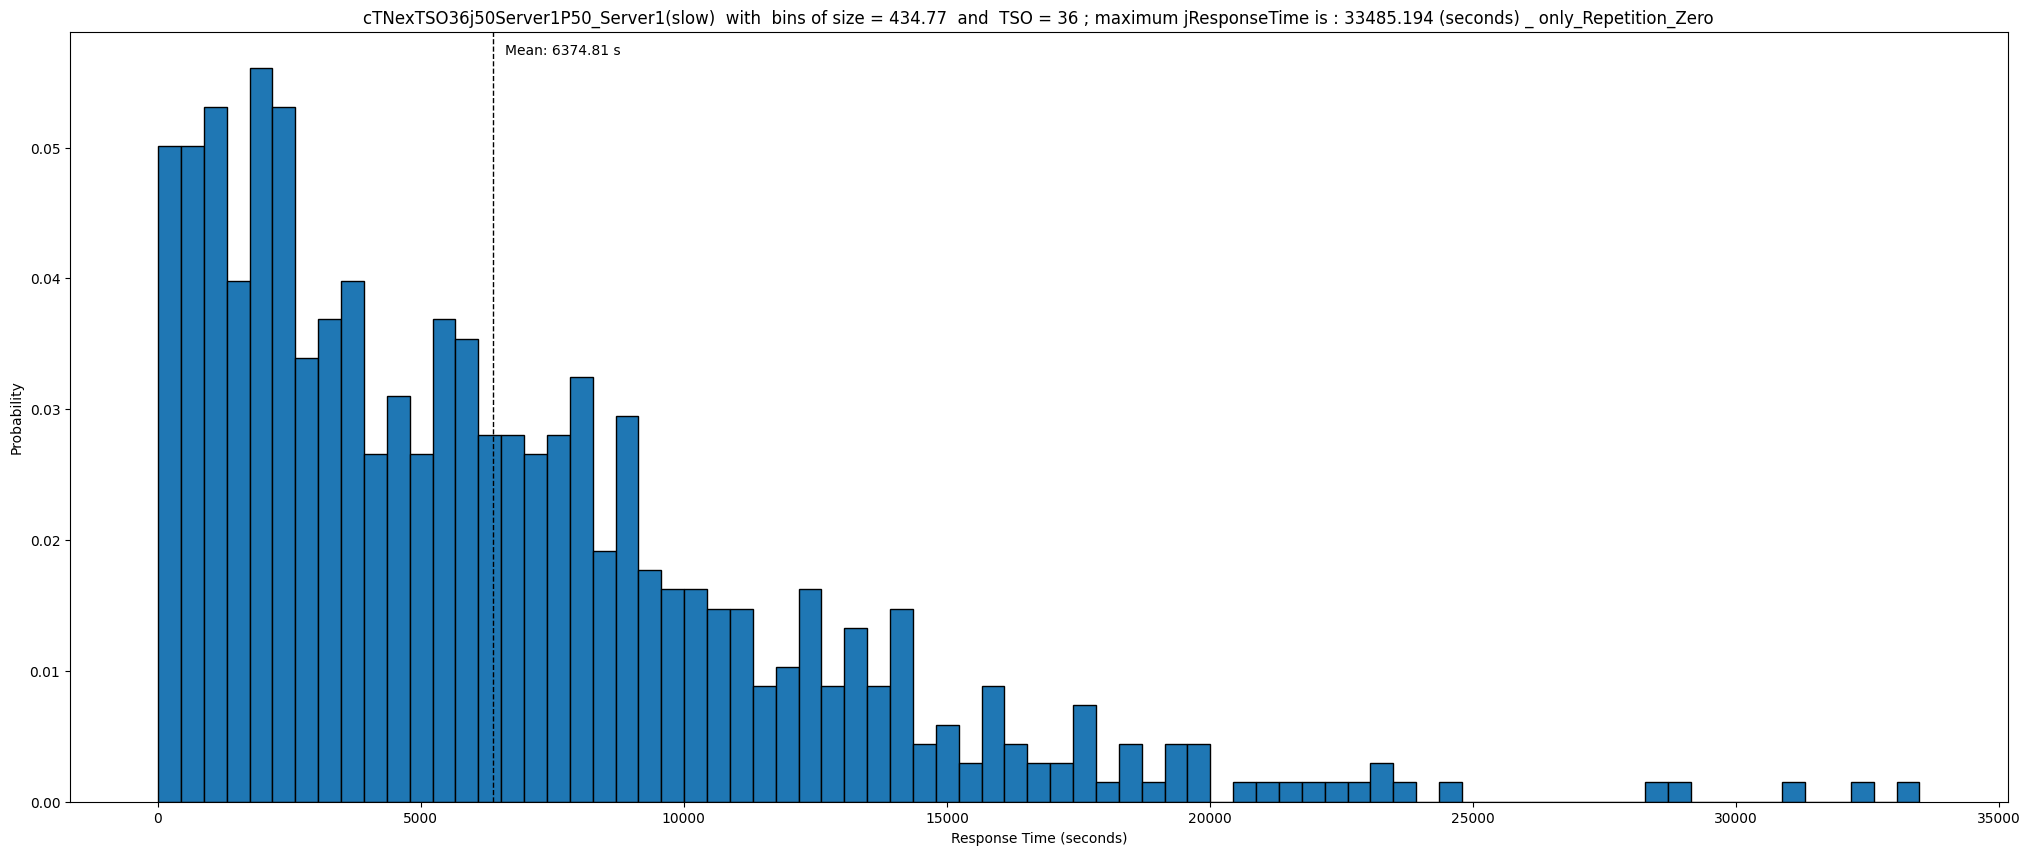

8677.056094674555


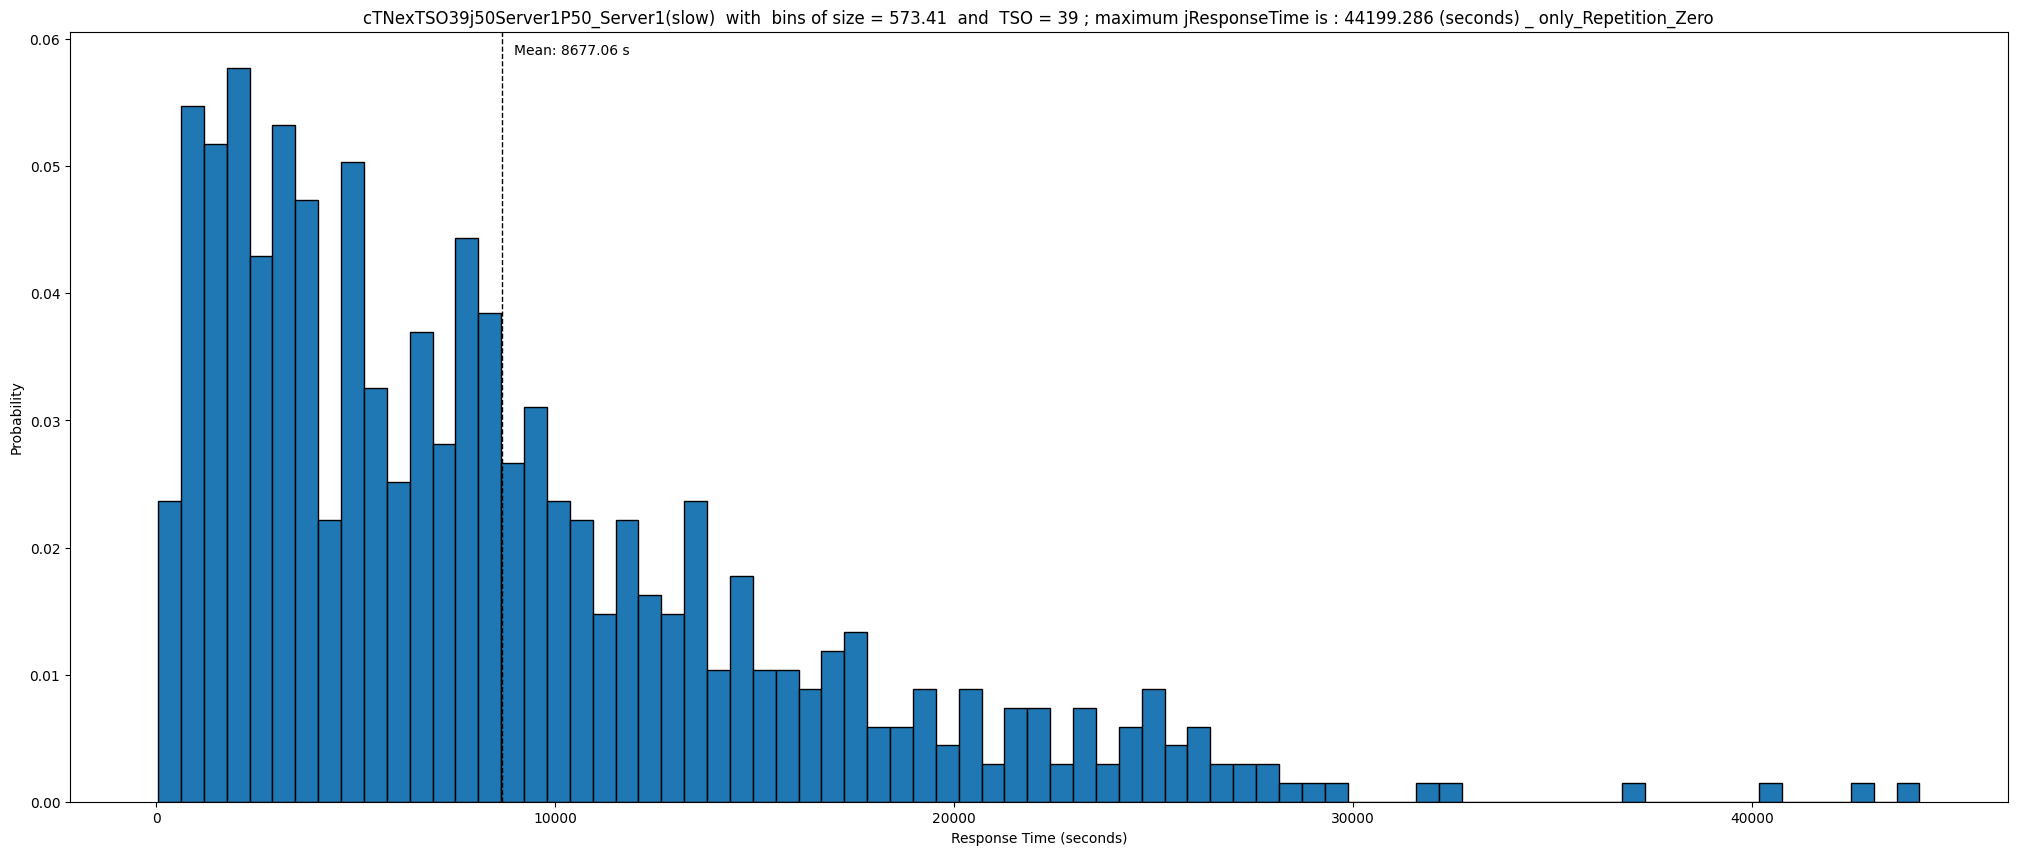

14404.280635670733


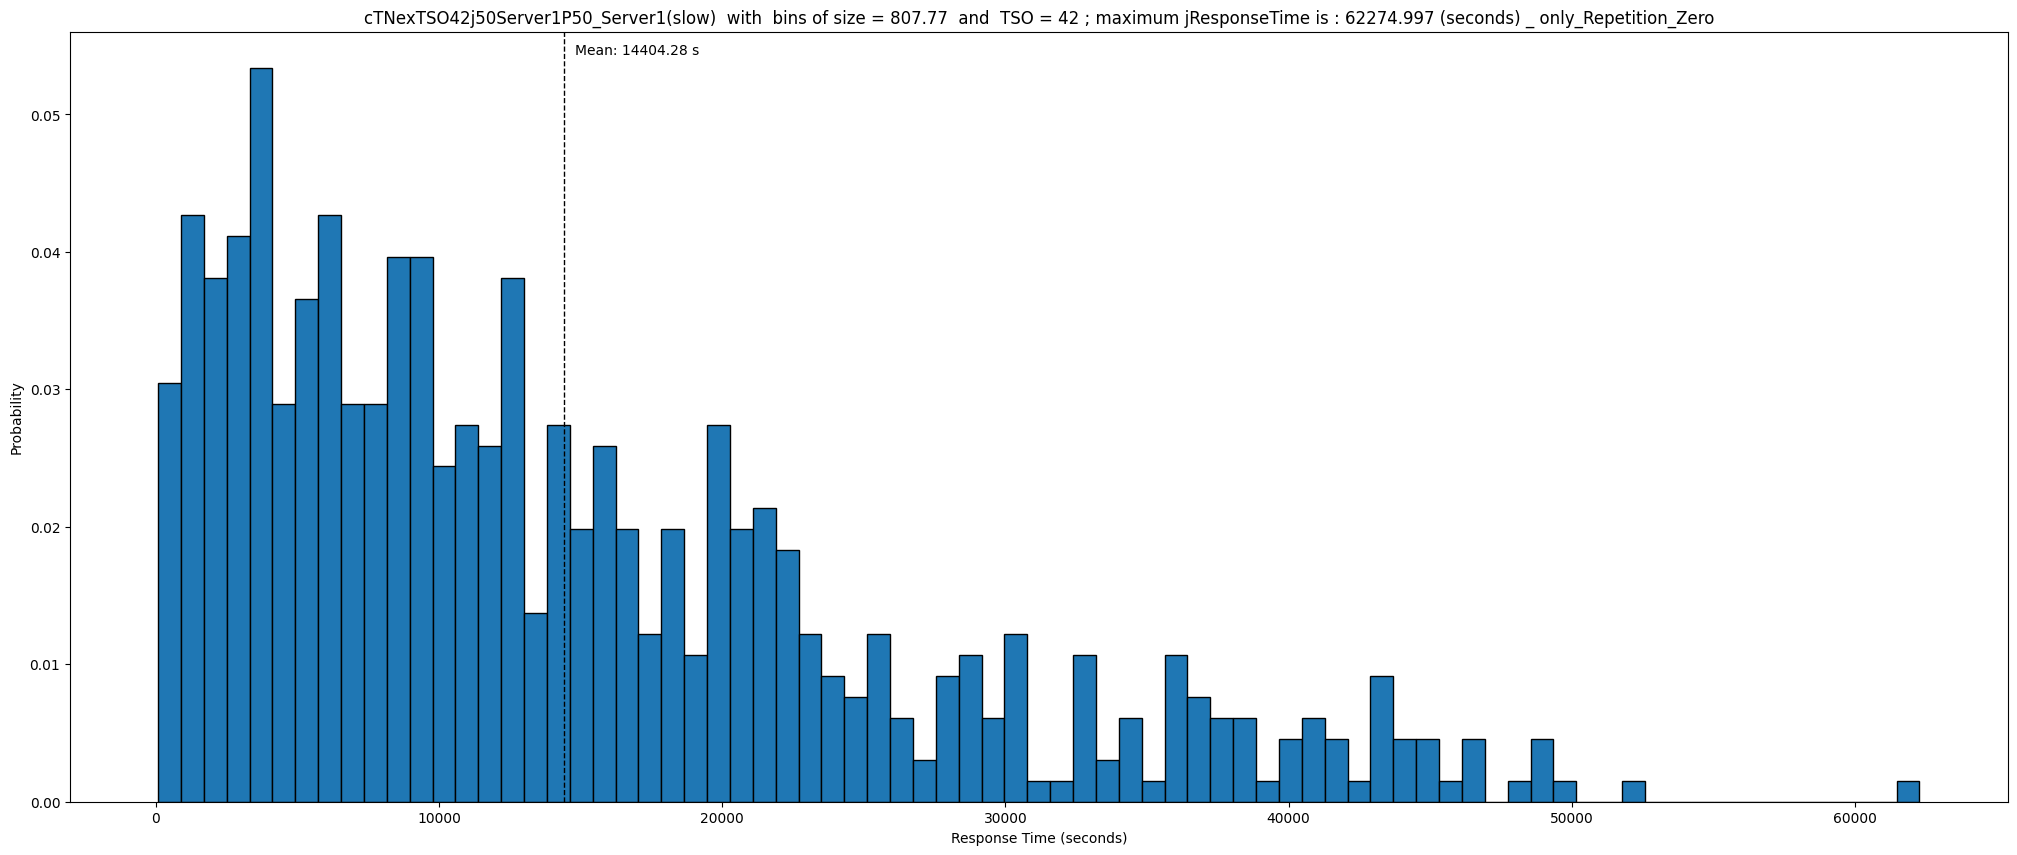

34406.40016174183


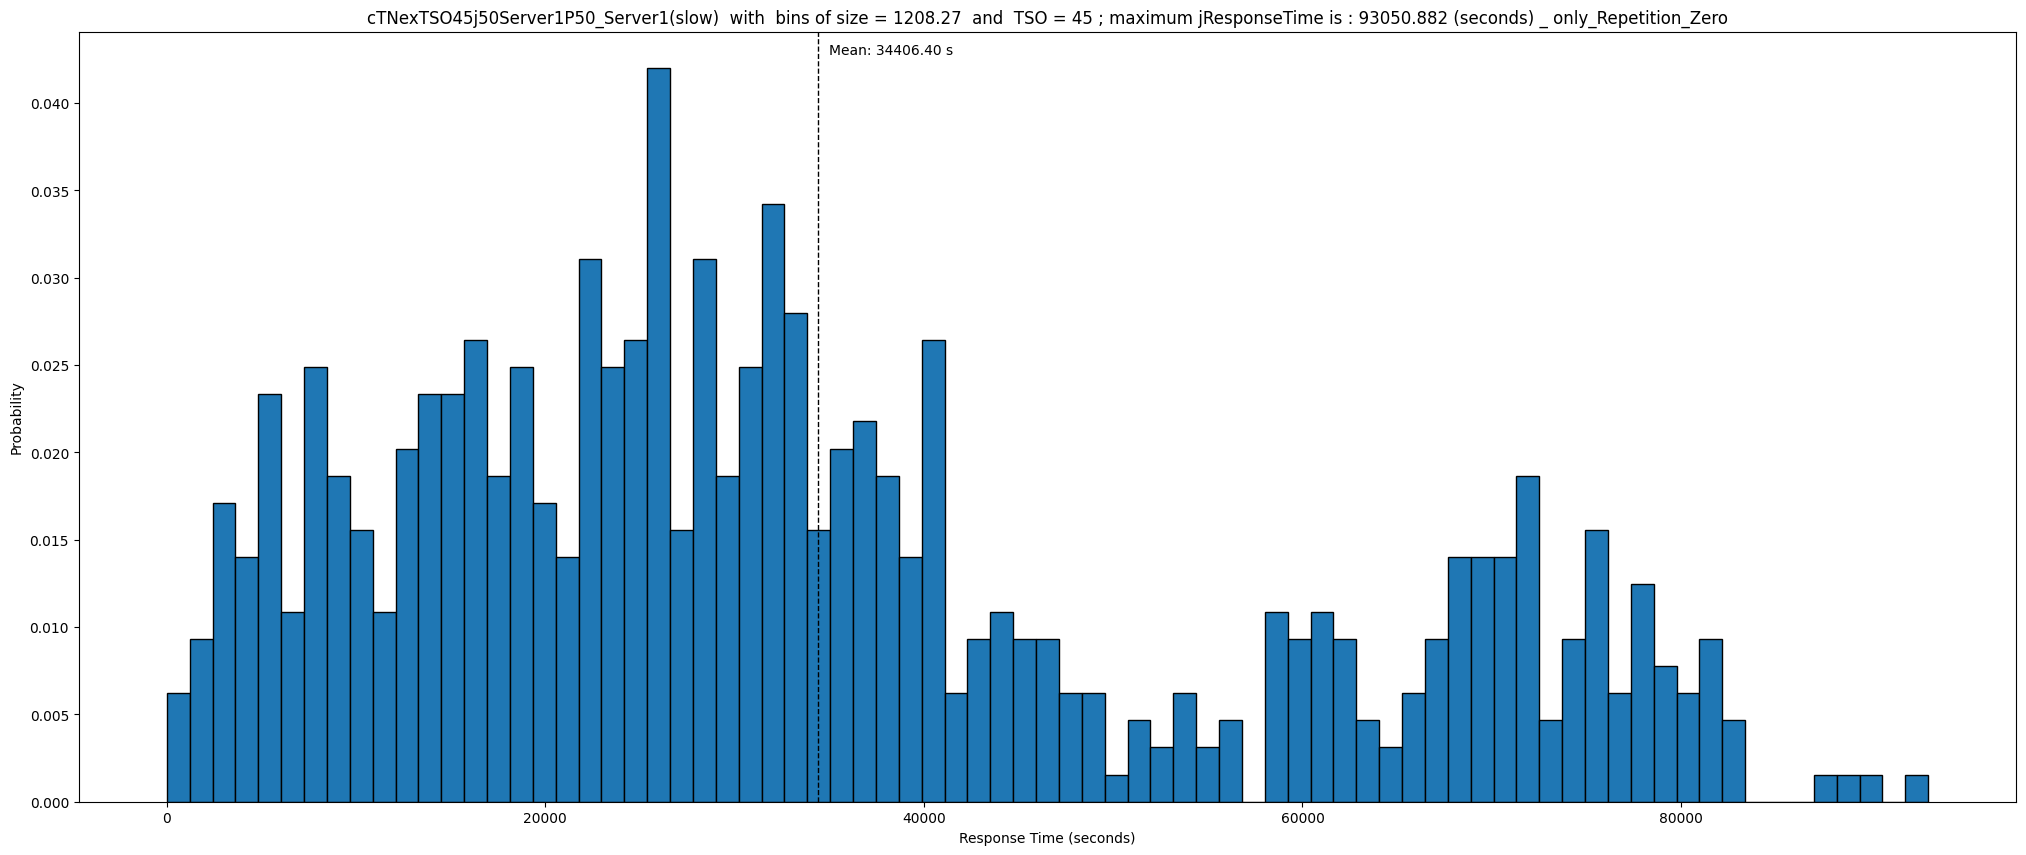

154971.95817770596


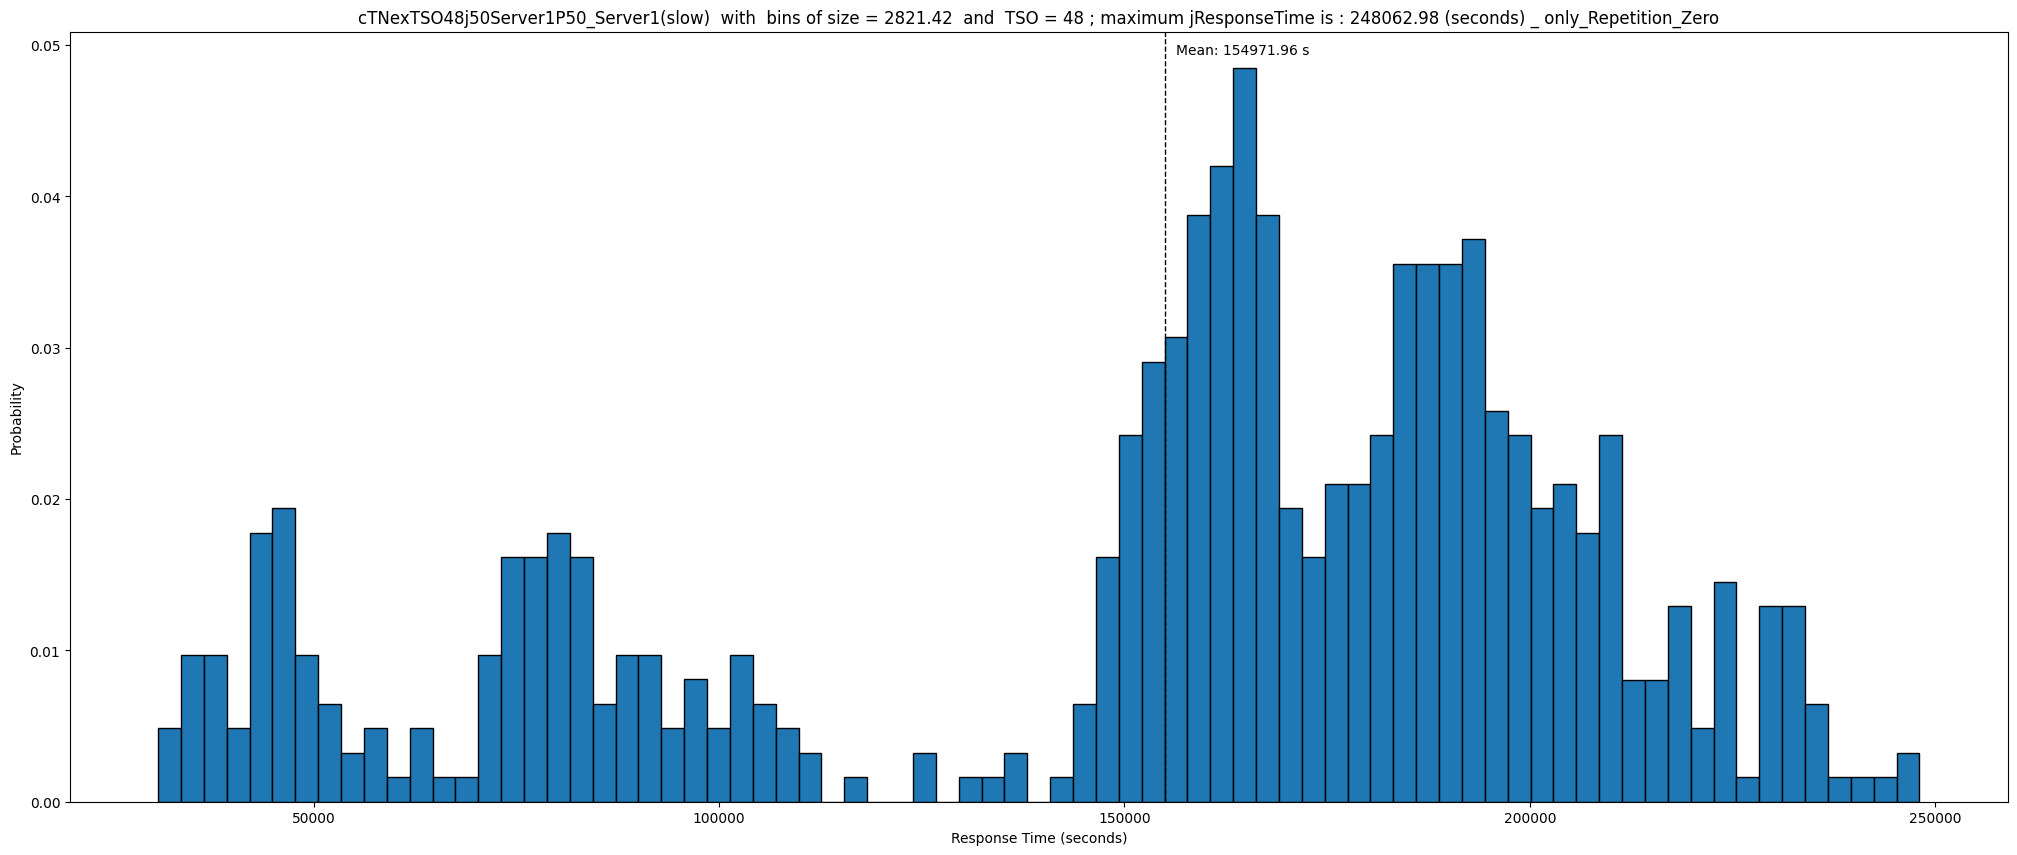

336394.29939419794


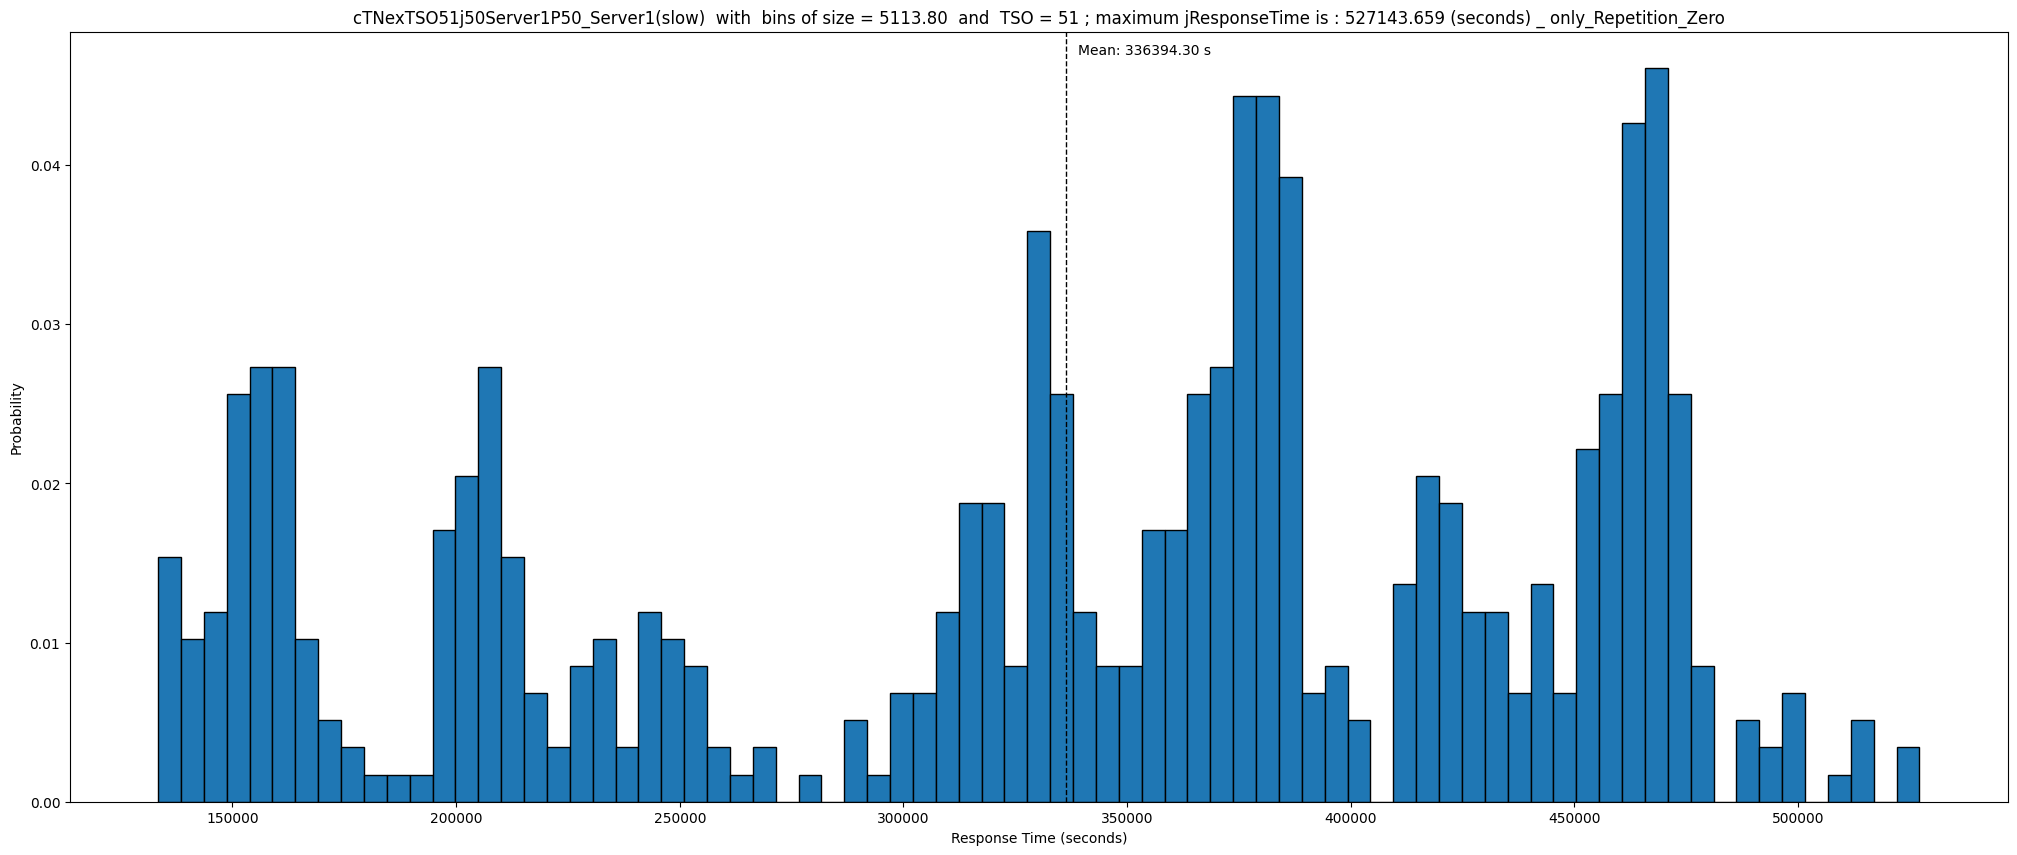

In [12]:
maximum_bins_number = 77

plot_dir = f'../images/plots' 
for srvn in range(0, len(server_names)):
    for tso_this_iter in range(0, len(target_tso), 1) :
        plt.rcParams["figure.figsize"] = (25, 10)
        

        massimo_jResTime = float( max(general_nums[srvn][tso_this_iter]) )
        #   print("massimo_jResTime : ", massimo_jResTime)
        #   bin_size_chosen = 35
        #   if int(target_tso[tso_this_iter]) > 30 and use_exp == False:
        #       bin_size_chosen = int(maximum_bins_number)
        #   print("bin_size_chosen is : ", bin_size_chosen)
        
        counts, bins = np.histogram( general_nums[srvn][tso_this_iter], bins = maximum_bins_number )

        counts = counts / len( general_nums[srvn][tso_this_iter] ) # normalize count
        #   print("counts : ", counts)
        #   print("bins : ", bins)

        #   #   my_massimo_jResTime = max(general_nums[srvn][tso_this_iter])
        #   #   my_bins = []
        #   #   my_counts = []
        #   #   for it in range(0, my_massimo_jResTime+1):
        #   #       #   print("it : ", it)
        #   #       my_bins.append(it-0.5)
        #   #       my_counts.append(0.0)
        #   #       
        #   #   for it in range(0, len(general_nums[srvn][tso_this_iter])):
        #   #       my_counts[general_nums[srvn][tso_this_iter][it]] += 1
        #   #   for it in range(0, len(my_counts)):
        #   #       my_counts[it] = my_counts[it]/len(general_nums[srvn][tso_this_iter])
        #   #   #   print(my_counts)
        #   #   my_bins.append(my_bins[-1]+1)
        #   #   #   print(my_bins)

        bin_width = bins[1]-bins[0]
        hbw = bin_width / 2
        #   bins = bins - hbw

        plt.hist(bins[:-1], bins, weights=counts, edgecolor='black')
        ax = plt.gca()
        ax.yaxis.get_major_formatter().set_scientific(False)
        ax.yaxis.get_major_formatter().set_useOffset(False)
        ax.xaxis.get_major_formatter().set_useOffset(False)
        ax.xaxis.get_major_formatter().set_scientific(False)

        extras = ["fast", "slow"]
        #   plt.hist(counts)
        name = f'cTNexTSO{target_tso[tso_this_iter]}j{probability}Server{srvn}P{probability}_Server{srvn}({extras[srvn]})'
        if use_all == True: 
            plt.title(f"{name}  with  bins of size = {bins[1]-bins[0]:.2f}  and  TSO = {target_tso[tso_this_iter]} ; maximum jResponseTime is : {massimo_jResTime} (seconds) _ use_All_Repetitions")
        else : 
            plt.title(f"{name}  with  bins of size = {bins[1]-bins[0]:.2f}  and  TSO = {target_tso[tso_this_iter]} ; maximum jResponseTime is : {massimo_jResTime} (seconds) _ only_Repetition_Zero")
        
        #   if bin_size_chosen < 50:
        #       plt.xticks(range(0, bin_size_chosen+1 , 1))
        #   if bin_size_chosen < 100:
        #       plt.xticks(range(0, bin_size_chosen+1 , 2))
        #   elif bin_size_chosen < 200:
        #       plt.xticks(range(0, bin_size_chosen+1 , 5))
        #   elif bin_size_chosen < 400:
        #       plt.xticks(range(0, bin_size_chosen+1 , 10))
        #   elif bin_size_chosen < 800:
        #       plt.xticks(range(0, bin_size_chosen+1 , 20))
        
        plt.ylabel("Probability")
        plt.xlabel("Response Time (seconds)")
        

        # print mean !
        target_asNpArray = np.array(general_nums[srvn][tso_this_iter])
        target_mean = target_asNpArray.mean()

        plt.axvline( target_mean , color='k', linestyle='dashed', linewidth=1 )
        min_ylim, max_ylim = plt.ylim()
        
        text_mean_location = target_mean + hbw
        plt.text( text_mean_location, max_ylim*0.97, 'Mean: {:.2f} s'.format(target_mean))
        print(target_mean)

        # exTNcTSO{}istRespTime

        endingPNG = ".png"

        save = True
        if save == True:
            plt.savefig(f'{plot_dir}/cTNexTSO{target_tso[tso_this_iter]}j{probability}Server{srvn}.png')
        
        plt.show()
    

In [13]:
#   run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,vectime,vecvalue

#   conTNexpTSOcompJmean51.csv


#   scalar,J_Network.server_0,completedJob:mean
#   target_tso = ["24"]
    
r1 = "scalar"
r2 = "J_Network.server_"
r3 = "completedJob:mean"
server_names = [0, 1]

general_array = []
for srvn in range(0, len(server_names)):
    jrespTime_all_tsos = []
    for tso_this_iter in range(0, len(target_tso), 1) :
        #   print(tso_this_iter)
        jrespTime_all_this_tso = []
        file_name_csv = f'conTNexpTSOcompJmean{target_tso[tso_this_iter]}.csv'

        with open(f'../simulations/results/{file_name_csv}') as csv_file : 
            reader = csv.reader(csv_file)
            repetitions_counter = 0
            for row in reader:
                if row[1]==r1 and row[2] == f'{r2}{server_names[srvn]}' and row[3]==r3:
                    rigaTarget = list(row)
                    #   print("hit row : ", row)
                    #   hit row :  ['testExpP50-0-20240111-20:04:46-18804', 'scalar', 'J_Network.server_0', 'completedJob:mean', '', '', '2386.8933293034', '', '', '', '', '', '', '', '']
                    #   print("listed row : ", rigaTarget)
                    #   print("len : ", len(rigaTarget))    #   15 .
                    
                    this_row_mean = float( rigaTarget[6] )
                    jrespTime_all_this_tso.append(this_row_mean)
                    
                    print("mean : ", this_row_mean , " ; repetitions_counter : ", repetitions_counter)
                    repetitions_counter += 1
                    
                    if use_all == False:
                        print("break")
                        break
        
        jrespTime_all_tsos.append(jrespTime_all_this_tso)
        print(f'{file_name_csv} _ len : {len(jrespTime_all_tsos[tso_this_iter])}' )
    general_array.append(jrespTime_all_tsos)

mean :  1636.5786347976  ; repetitions_counter :  0
break
conTNexpTSOcompJmean24.csv _ len : 1
mean :  1976.4468645921  ; repetitions_counter :  0
break
conTNexpTSOcompJmean27.csv _ len : 1
mean :  2486.2590199005  ; repetitions_counter :  0
break
conTNexpTSOcompJmean30.csv _ len : 1
mean :  2991.1260236735  ; repetitions_counter :  0
break
conTNexpTSOcompJmean33.csv _ len : 1
mean :  4183.8039372486  ; repetitions_counter :  0
break
conTNexpTSOcompJmean36.csv _ len : 1
mean :  6423.0231136181  ; repetitions_counter :  0
break
conTNexpTSOcompJmean39.csv _ len : 1
mean :  11120.242268196  ; repetitions_counter :  0
break
conTNexpTSOcompJmean42.csv _ len : 1
mean :  30750.116960723  ; repetitions_counter :  0
break
conTNexpTSOcompJmean45.csv _ len : 1
mean :  154359.56434302  ; repetitions_counter :  0
break
conTNexpTSOcompJmean48.csv _ len : 1
mean :  339346.07693286  ; repetitions_counter :  0
break
conTNexpTSOcompJmean51.csv _ len : 1
mean :  2924.8216640316  ; repetitions_counter :  

In [15]:
def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.01):
    mean = np.mean(values)
    stdev = np.std(values)
    confidence_interval = z * stdev / np.sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color=color)

    #   plt.plot( [x,x] , [top, top] , color = '#052BFF')

    return mean, confidence_interval

this_mean :  1636.5786347976
this_mean :  1976.4468645921
this_mean :  2486.2590199005
this_mean :  2991.1260236735
this_mean :  4183.8039372486
this_mean :  6423.0231136181
this_mean :  11120.242268196
this_mean :  30750.116960723
this_mean :  154359.56434302
this_mean :  339346.07693286


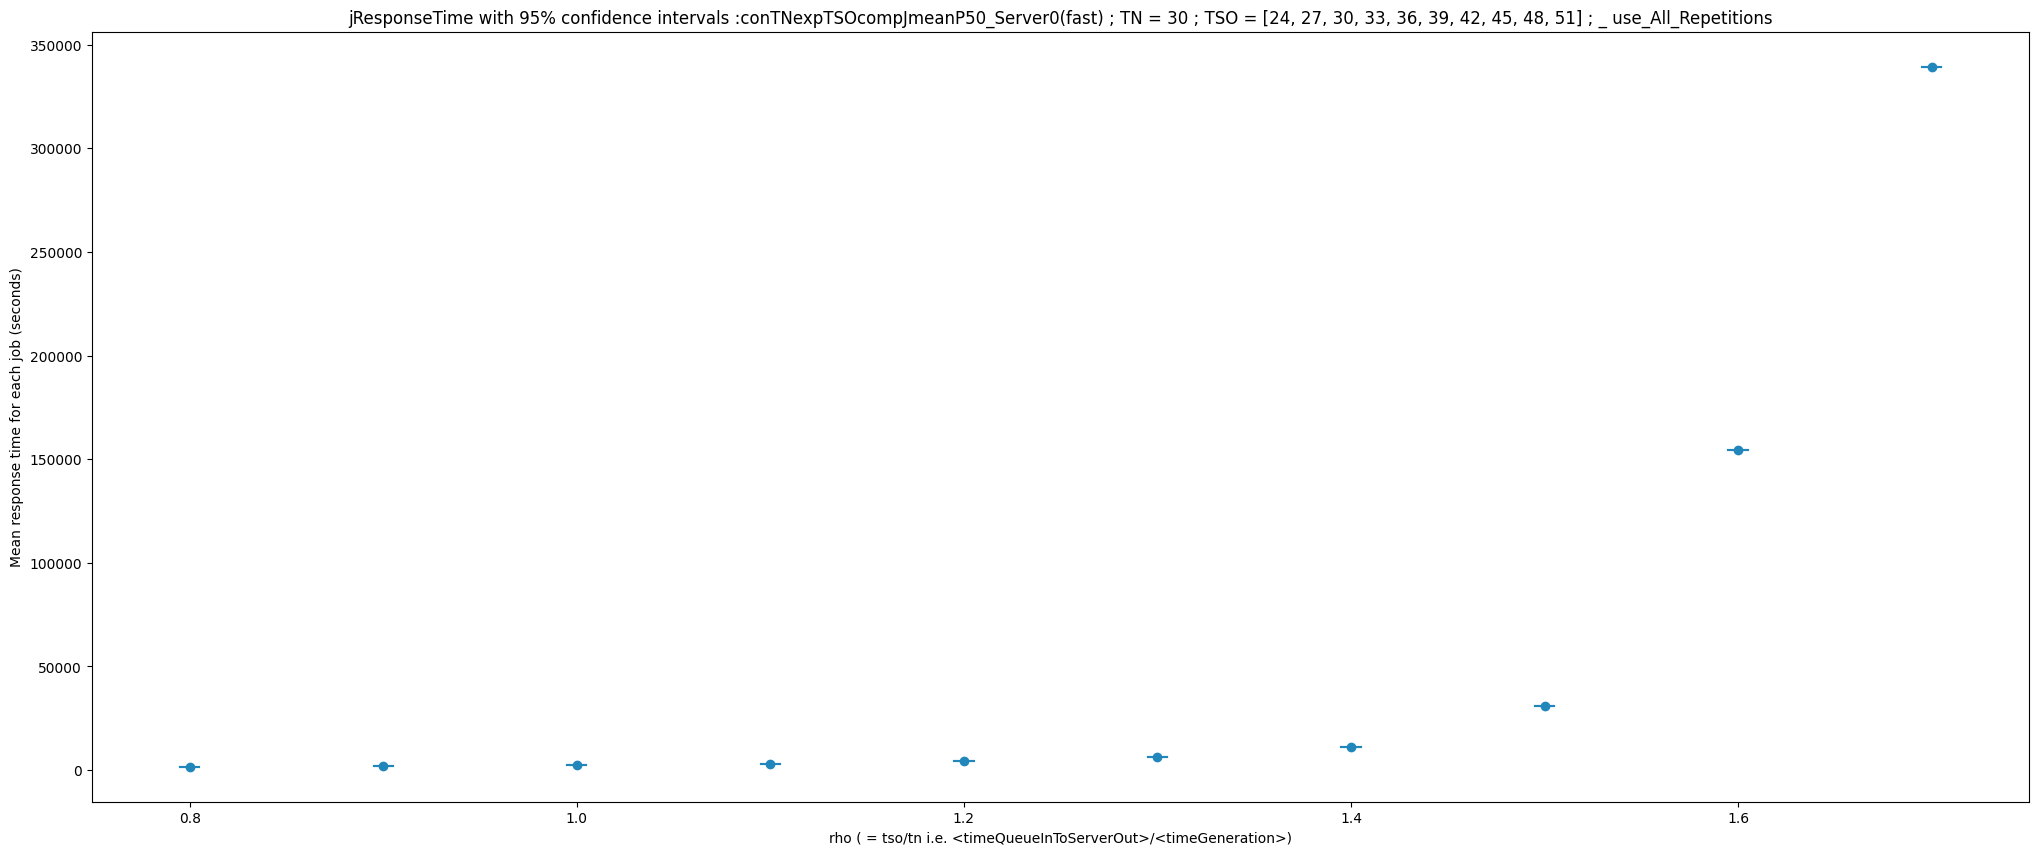

this_mean :  2924.8216640316
this_mean :  3419.0458128415
this_mean :  4094.889598878
this_mean :  4939.5128491379
this_mean :  6374.8148244838
this_mean :  8677.0560946746
this_mean :  14404.280635671
this_mean :  34406.400161742
this_mean :  154971.95817771
this_mean :  336394.2993942


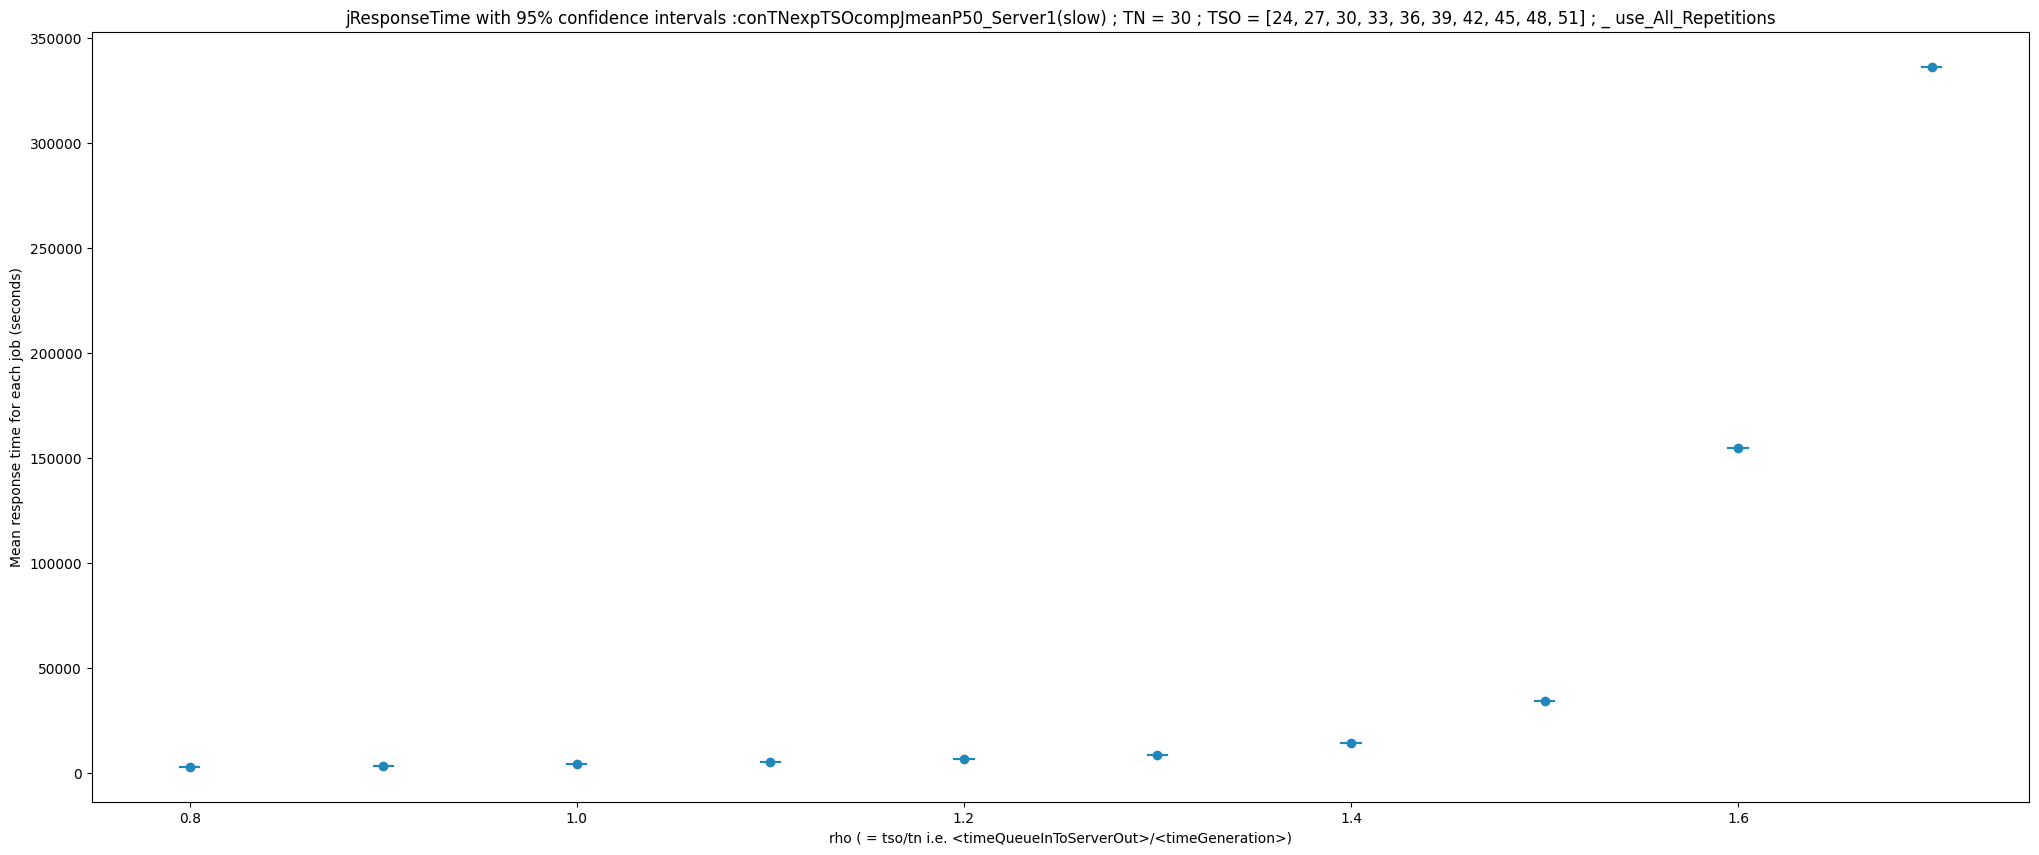

In [17]:
#	we studying completed job mean time !
#	#	r1 = "scalar"
#	#	r2 = "J_Network.server_"
#	#	r3 = "completedJob:mean"

plot_dir = f'../images/plots' 

for srvn in range(0, len(server_names)):
	plt.rcParams["figure.figsize"] = (25, 10)
	for tso_this_iter in range(0, len(target_tso), 1) :
		this_tso_averages = general_array[srvn][tso_this_iter]
		#	print(this_tso_averages)
		#	print("tipo di this_tso_averages : ", type(this_tso_averages))
		#	print("tipo di this_tso_averages[0] : ", type(this_tso_averages[0]))
		#	print("tipo di target_tn : ", type(target_tn))
		#	#	tipo di this_tso_averages :  <class 'list'>
		#	#	tipo di this_tso_averages[0] :  <class 'float'>
		#	#	tipo di target_tn :  <class 'float'>
		this_mean , this_conf_int = plot_confidence_interval( float(target_tso[tso_this_iter])/float(target_tn) , np.array(this_tso_averages))
		print("this_mean : ", this_mean)
		#	print(this_conf_int)

	#	rho = np.linspace(0.05, 2, 100)
	#	rho = rho 
	#	plt.plot(rho, rho**2/(1-rho)   , color='r', label="rho^2/(1-rho)")
	#	plt.legend(loc="upper left")
		
	extras = ["fast", "slow"]
	name = f'jResponseTime with 95% confidence intervals :conTNexpTSOcompJmeanP{probability}_Server{srvn}({extras[srvn]})'
	plt.title(f"{name} ; TN = 30 ; TSO = {target_tso} ; _ use_All_Repetitions")
        

	plt.ylabel("Mean response time for each job (seconds)")
	plt.xlabel("rho ( = tso/tn i.e. <timeQueueInToServerOut>/<timeGeneration>)")
     
	save = False
	if save == True:
		if use_all == True: 
			plt.savefig(f'{plot_dir}/jResTime_ConfidenceIntervals_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_Server{srvn}.png')
		else :
			plt.savefig(f'{plot_dir}/jResTime_ConfidenceIntervals_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_onlyIterZero_Server{srvn}.png')
	
	plt.show()





In [18]:
print("before merge")
print(general_array[0][7])
print(general_array[1][7])

print(len(general_array[0][7]))
print(len(general_array[1][7]))

before merge
[30750.116960723]
[34406.400161742]
1
1


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv


In [20]:
#   USE ESPONENTIAL OR CONSTANT
use_exp = True

if use_exp == True:
    distribution = "Exp"
    dddistribution = "exp"
elif use_exp == False:
    distribution = "Con"
    dddistribution = "con"

#   target_tso = ["50"]
detailed = True
if detailed == True :
    target_tso = list(range(24, 51+1, 3) )
else :
    if use_exp == True :
        target_tso = ["25","30","35", "40", "45", "50"]
    elif use_exp == False:
        target_tso = ["25","30","35", "40", "45", "50"]


# USE ALL ITERATIONS OR ONLY FIRST
num_iterations = 30

use_all = True

target_tn = 30

# PROBABILITY
probability = 50

In [21]:
print( len(target_tso) )

10


In [22]:
# merge servers

# scalar,J_Network.server_0,completedJob:mean

r1 = "scalar"
r2 = "J_Network.server_"
r3 = "completedJob:mean"
server_names = [0, 1]

merged_array = []

for tso_this_iter in range(0, len(target_tso), 1) :
    #   print(tso_this_iter)
    jrespTime_all_this_tso = []
    file_name_csv = f'conTNexpTSOcompJmean{target_tso[tso_this_iter]}.csv'

    for srvn in range(0, len(server_names)):
        with open(f'../simulations/results/{file_name_csv}') as csv_file : 
            reader = csv.reader(csv_file)
            repetitions_counter = 0
            for row in reader:
                if row[1]==r1 and row[2] == f'{r2}{server_names[srvn]}' and row[3]==r3:
                    rigaTarget = list(row)
                    #   print("hit row : ", row)
                    #   hit row :  ['testExpP50-0-20240111-20:04:46-18804', 'scalar', 'J_Network.server_0', 'completedJob:mean', '', '', '2386.8933293034', '', '', '', '', '', '', '', '']
                    #   print("listed row : ", rigaTarget)
                    #   print("len : ", len(rigaTarget))    #   15 .
                    
                    this_row_mean = float( rigaTarget[6] )

                    #   if tso_this_iter==7 :
                    #       print("server", srvn, " ;tso ", tso_this_iter, " ;mean :", this_row_mean)
                    
                    jrespTime_all_this_tso.append(this_row_mean)
                    
                    #   print("mean : ", this_row_mean , " ; repetitions_counter : ", repetitions_counter)
                    #   repetitions_counter += 1
                    
                    if use_all == False:
                        print("break")
                        break
        
    merged_array.append(jrespTime_all_this_tso)


In [23]:
print("after merge")
print(len(merged_array))
print(merged_array[7])
print(len(merged_array[7]))

after merge
10
[30750.116960723, 31512.475739875, 29611.384060062, 18604.95581717, 32671.667283385, 23998.140343168, 37415.007700565, 39989.055087423, 39403.364740599, 24905.626856362, 138559.69487307, 49134.659986811, 12986.106882775, 28775.031869738, 70821.117672552, 55381.296568275, 55900.140350353, 105796.7539336, 90694.184319512, 160779.52007711, 68823.892072575, 60251.375226956, 14801.938753155, 76343.071697767, 74059.200862671, 118438.10165968, 27231.517437893, 43486.643876947, 193338.32105428, 62764.161222488, 34406.400161742, 34783.343616923, 32547.385557724, 21128.355563953, 35616.760469539, 27461.63301875, 38151.709768882, 42700.162532154, 40349.956631912, 27595.663641994, 142006.27457591, 51354.757337621, 15313.482526475, 29495.983616438, 74279.409870607, 57089.377487654, 60356.604910543, 109575.50191626, 91339.551642973, 161793.18595313, 71964.514775081, 62522.007483766, 16321.997747368, 78257.737513513, 74662.312141141, 122870.15064379, 29446.620397174, 47326.991356481, 1

In [25]:
sums_merg = []

#   #   #   #   scalar,J_Network.server_0,completedJob:sum (NO)
#   scalar,J_Network.sink_0,recvJob:sum
# merge servers
# conTNecpTSOrecvJsum24.csv

r1 = "scalar"
r2 = "J_Network.sink_"
r3 = "recvJob:sum"
server_names = [0, 1]

for tso_this_iter in range(0, len(target_tso), 1) :
    #   print(tso_this_iter)
    sums_jrespTime_all_this_tso = []
    file_name_csv = f'conTNexpTSOrecvJsum{target_tso[tso_this_iter]}.csv'

    for srvn in range(0, len(server_names)):
        with open(f'../simulations/results/{file_name_csv}') as csv_file : 
            reader = csv.reader(csv_file)
            repetitions_counter = 0
            for row in reader:
                if row[1]==r1 and row[2] == f'{r2}{server_names[srvn]}' and row[3]==r3:
                    rigaTarget = list(row)
                                        
                    this_row_sum = float( rigaTarget[6] )

                    #   if tso_this_iter==7 :
                    #       print("server", srvn, " ; tso ", tso_this_iter, " ; mean :", this_row_sum)
                    
                    sums_jrespTime_all_this_tso.append(this_row_sum)
                                      
                    if use_all == False:
                        print("break")
                        break
        
    sums_merg.append(sums_jrespTime_all_this_tso)


In [26]:
print("after merge")
print(len(sums_merg))
print(sums_merg[7])
print(len(sums_merg[7]))

after merge
10
[1273.0, 1284.0, 1282.0, 1258.0, 1288.0, 1288.0, 1239.0, 1304.0, 1303.0, 1281.0, 1229.0, 1289.0, 1254.0, 1259.0, 1246.0, 1223.0, 1273.0, 1265.0, 1230.0, 1219.0, 1309.0, 1291.0, 1268.0, 1254.0, 1318.0, 1240.0, 1272.0, 1284.0, 1216.0, 1254.0, 643.0, 650.0, 615.0, 688.0, 673.0, 640.0, 662.0, 622.0, 633.0, 662.0, 606.0, 622.0, 661.0, 657.0, 626.0, 648.0, 626.0, 621.0, 619.0, 640.0, 618.0, 616.0, 665.0, 592.0, 666.0, 612.0, 637.0, 648.0, 638.0, 637.0]
60


In [27]:
weighted_merge = []
for tso_this_iter in range(0, len(target_tso), 1) :
    it = 0
    #   print(len (sums_merg[tso_this_iter]) )
    #   print(len (merged_array[tso_this_iter]) )
    merge_this_tso = []
    while it < num_iterations :
        prod_s0 = sums_merg[tso_this_iter][it] * merged_array[tso_this_iter][it]
        prod_s1 = sums_merg[tso_this_iter][it+num_iterations] * merged_array[tso_this_iter][it+num_iterations]
        num_jobs_both_servers = sums_merg[tso_this_iter][it] + sums_merg[tso_this_iter][it+num_iterations]

        weighted_avg = ( prod_s0 + prod_s1 ) / num_jobs_both_servers
        
        #   if tso_this_iter == 7 :
        #       print(f'it_{it} : ({sums_merg[tso_this_iter][it]}*{merged_array[tso_this_iter][it]})+({sums_merg[tso_this_iter][it+num_iterations]}*{merged_array[tso_this_iter][it+num_iterations]}) = {prod_s0 + prod_s1} , avg = {weighted_avg}' )
        
        merge_this_tso.append(weighted_avg)

        it += 1
    weighted_merge.append(merge_this_tso)

# 1872.0 * 2880.0 , 1894.0 * 2880.0 -> 
    

In [28]:
print(weighted_merge)
print( len(weighted_merge ))
print( len(weighted_merge[7] ))

[[2145.837207291666, 2164.0893531249885, 2210.8409484911895, 2047.7301567708082, 2124.635626041653, 2038.224402604143, 2193.140526836898, 2192.6247666666404, 2074.9830478917534, 2121.7449223554067, 2273.247913541628, 2151.918697759235, 2072.854071391368, 2054.4839327774675, 2226.1192856399384, 2234.374525247259, 2180.5735839415993, 2190.5901176470697, 2294.5524836193085, 2253.7051520041455, 2249.364454214336, 2182.330510948934, 2046.7091104166545, 2278.3789750000174, 2005.71672083333, 2237.23912181155, 2151.131406559066, 2201.0979942708573, 2259.048073475784, 2186.921873503373], [2526.1514091618865, 2513.951081813479, 2637.196290994284, 2391.778123958343, 2471.388716371222, 2313.1981886399194, 2584.3128269932345, 2554.5075977071488, 2444.2916513809314, 2443.5996661458494, 2726.4850114523583, 2528.178886399136, 2385.3730229285866, 2425.563624999968, 2684.25244479169, 2585.2207552083323, 2632.6582537780014, 2606.8279744924503, 2724.5149577905113, 2660.0497708333287, 2533.227184895814, 25

In [29]:
def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.01):
    mean = np.mean(values)
    stdev = np.std(values)
    confidence_interval = z * stdev / np.sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color=color)

    #   plt.plot( [x,x] , [top, top] , color = '#052BFF')

    return mean, confidence_interval

tso_this_iter :  24  ; this_mean :  2168.140298755936
tso_this_iter :  27  ; this_mean :  2560.1098315277845
tso_this_iter :  30  ; this_mean :  3055.770958940562
tso_this_iter :  33  ; this_mean :  3790.273757786835
tso_this_iter :  36  ; this_mean :  4910.734929988562
tso_this_iter :  39  ; this_mean :  6998.216991337422
tso_this_iter :  42  ; this_mean :  13476.440434908645
tso_this_iter :  45  ; this_mean :  61419.877588030955
tso_this_iter :  48  ; this_mean :  220994.1893029235
tso_this_iter :  51  ; this_mean :  405790.7470513826


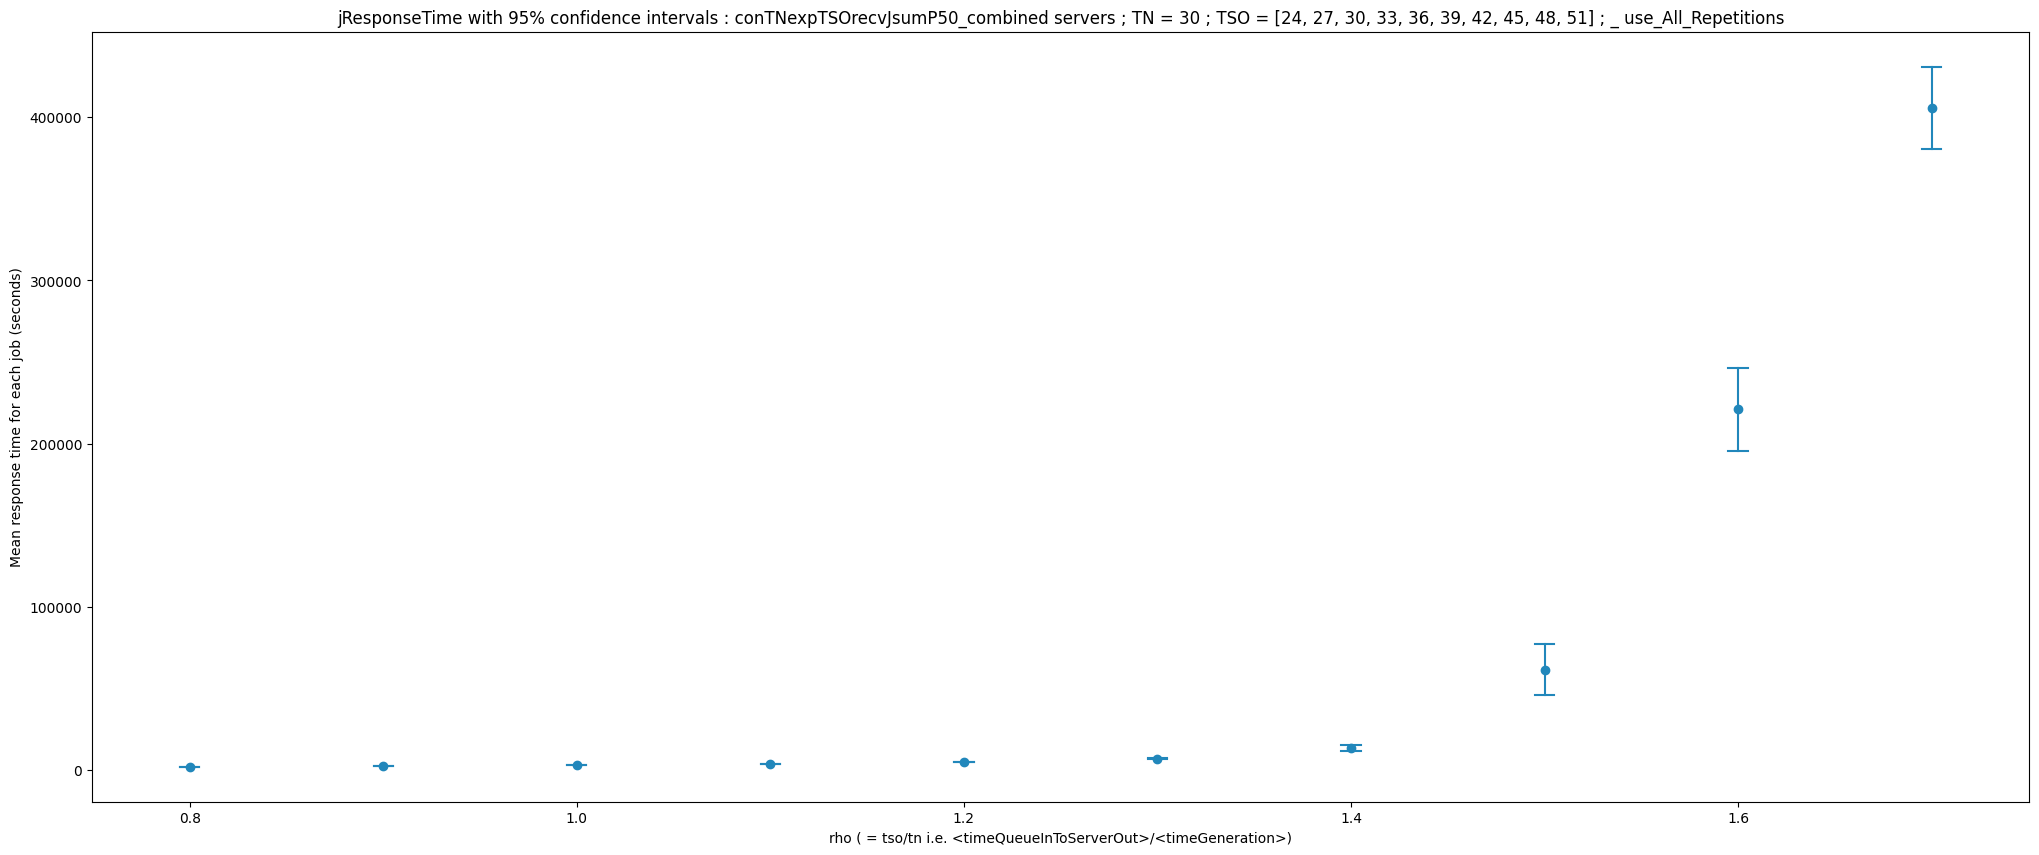

In [32]:


plot_dir = f'../images/plots' 

plt.rcParams["figure.figsize"] = (25, 10)
for tso_this_iter in range(0, len(target_tso), 1) :
    this_tso_averages = weighted_merge[tso_this_iter]
    #	print(this_tso_averages)
    #	print("tipo di this_tso_averages : ", type(this_tso_averages))
    #	print("tipo di this_tso_averages[0] : ", type(this_tso_averages[0]))
    #	print("tipo di target_tn : ", type(target_tn))
    #	#	tipo di this_tso_averages :  <class 'list'>
    #	#	tipo di this_tso_averages[0] :  <class 'float'>
    #	#	tipo di target_tn :  <class 'float'>
    this_mean , this_conf_int = plot_confidence_interval( float(target_tso[tso_this_iter])/float(target_tn) , np.array(this_tso_averages))
    print("tso_this_iter : ", target_tso[tso_this_iter], " ; this_mean : ", this_mean)
    #	print(this_conf_int)

#	rho = np.linspace(0.05, 2, 100)
#	rho = rho 
#	plt.plot(rho, rho**2/(1-rho)   , color='r', label="rho^2/(1-rho)")
#	plt.legend(loc="upper left")
    
extras = ["fast", "slow"]
name = f'jResponseTime with 95% confidence intervals : conTNexpTSOrecvJsumP{probability}_combined servers'
if use_all == True: 
    plt.title(f"{name} ; TN = 30 ; TSO = {target_tso} ; _ use_All_Repetitions")
    

plt.ylabel("Mean response time for each job (seconds)")
plt.xlabel("rho ( = tso/tn i.e. <timeQueueInToServerOut>/<timeGeneration>)")
    
save = True
use_log = False

if use_log :
    plt.yscale('log')
if save == True and use_log==True:
    plt.savefig(f'{plot_dir}/j{probability}cTNezTSO{target_tso[tso_this_iter]}MergedCIlog.png')
elif save == True:
    plt.savefig(f'{plot_dir}/j{probability}cTNezTSO{target_tso[tso_this_iter]}MergedCI.png')


plt.show()
